# <span style="color:navy">Project Name-Telco_Customer_Churn</span>
## <span style="color:darkgreen">Batch17- Group_F</span>

### Business Problem:-

The telecommunications industry is characterized by intense competition, providing customers with numerous service provider options. Consequently, operators face a substantial challenge in retaining their customer base, with an average annual churn rate ranging from 15-20%. This high churn rate poses a significant concern for telecom companies due to the exorbitant costs associated with acquiring new customers—typically 5-10 times more expensive than retaining existing ones

###  Key Objectives:-

1.Identifying Reasons for Customer Attrition**
  
2.Measuring Customer Churn **

3.Predicting Customer Behavior to Facilitate Retention:**

4.Designing Effective Customer Retention Programs:**
  
5.Strategic Communication and Customer Engagement:**

6.Cross-Functional Collaboration:**.

#### Project Summary :- 

Telco customer churn remains a significant challenge for the industry, with an average annual churn rate of 15-20%. To address this issue, identifying the reasons for customer defection is crucial.Using the Telco Customer Churn dataset from Kaggle, this project aims to explore the factors contributing to customer churn and develop predictive models to forecast customer behavior. The ultimate goal is to design effective customer retention programs and improve cross-functional collaboration to minimize churn and boost customer loyalty.

With these assumptions in mind, the project aims to develop predictive models that can identify which customers are at risk of churning and provide insights on how to retain them. By leveraging machine learning algorithms and statistical techniques, the models will analyze a range of customer and service-related variables to forecast customer behavior and inform retention strategies.

#### Data Source Link

SOURCE : KAGGLE
https://www.kaggle.com/datasets/blastchar/telco-customer-churn

#### Data Dictionary

Serial No) Feature:  Description
1) customerID:  Customer ID
2) gender:  Whether the customer is a male or a female
3) SeniorCitizen:  Whether the customer is a senior citizen or not (1, 0)
4) Partner:  Whether the customer has a partner or not (Yes, No)
5) Dependents:  Whether the customer has dependents or not (Yes, No)
6) tenure:  Number of months the customer has stayed with the company
7) PhoneService:  Whether the customer has a phone service or not (Yes, No)
8) MultipleLines:  Whether the customer has multiple lines or not (Yes, No, No phone service)
9) InternetService:  Customer’s internet service provider (DSL, Fiber optic, No)
10) OnlineSecurity:  Whether the customer has online security or not (Yes, No, No internet service)
11) OnlineBackup:  Whether the customer has online backup or not (Yes, No, No internet service)
12) DeviceProtection:  Whether the customer has device protection or not (Yes, No, No internet service)
13) TechSupport:  Whether the customer has tech support or not (Yes, No, No internet service)
14) StreamingTV:  Whether the customer has streaming TV or not (Yes, No, No internet service)
15) StreamingMovies:  Whether the customer has streaming movies or not (Yes, No, No internet service)
16) Contract:  The contract term of the customer (Month-to-month, One year, Two year)
17) PaperlessBilling:  Whether the customer has paperless billing or not (Yes, No)
18) PaymentMethod:  The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
19) MonthlyCharges:  The amount charged to the customer monthly
20) TotalCharges:  The total amount charged to the customer


### Import required libraries

In [1]:
#import the required libraries
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.ticker as mtick  
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
# Suppress FutureWarnings from Seaborn
warnings.simplefilter(action='ignore', category=FutureWarning)
# Restore the default warning settings
warnings.resetwarnings()

### Loading the Data file

In [3]:
telco_base_data = pd.read_csv("D:\\BYOP\\WA_Fn-UseC_-Telco-Customer-Churn (1).csv")

#### Dataset First Veiw

In [4]:
telco_base_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#### Dataset Last View

In [5]:
telco_base_data.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


#### Dataset Rows and Columns Count

In [6]:
telco_base_data.shape

(7043, 21)

#### Columns Name of hte Dataframe

In [7]:
telco_base_data.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

#### Get the Data types of Each column

In [8]:
telco_base_data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

## Data Cleaning

Data Cleaning: Convert 'TotalCharges' to Numeric and 'SeniorCitizen' to Object

In [9]:
telco_base_data.TotalCharges = pd.to_numeric(telco_base_data.TotalCharges, errors='coerce')
#telco_base_data.SeniorCitizen = pd.to_object(telco_base_data.SeniorCitizen, errors='coerce')
telco_base_data['SeniorCitizen'] = telco_base_data['SeniorCitizen'].astype('object')

checking the Datatypes once again after changeing the Datatype of TotalCharges and SeniorCitizen

In [10]:
telco_base_data.dtypes

customerID           object
gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

#### Checking the descriptive statistics of numeric variables

In [11]:
telco_base_data.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2266.771362
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3794.737500
max,72.000000,118.750000,8684.800000


75% customers have tenure less than 55 months

Average Monthly charges are USD 64.76 whereas 25% customers pay more than USD 89.85 per month

#### Checking & Plotting the Target Variable(Churn) on each categories

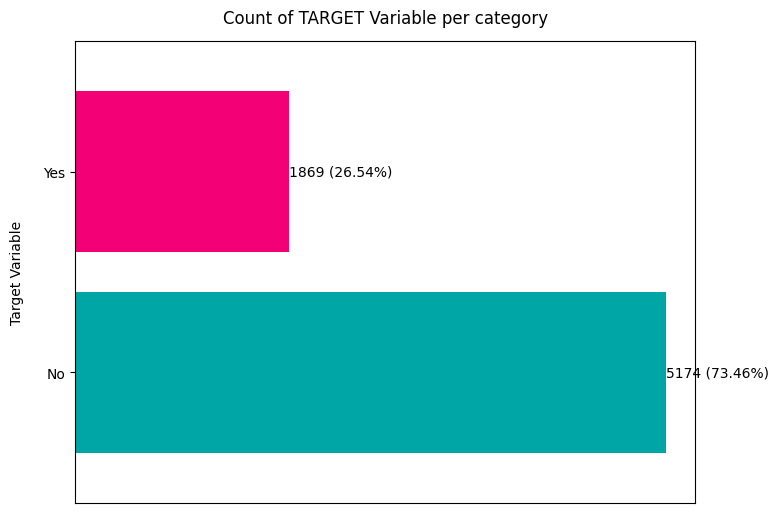

In [12]:
import matplotlib.pyplot as plt

# Assuming 'Churn' is a binary variable with values 'Yes' and 'No'
churn_counts = telco_base_data['Churn'].value_counts()

plt.figure(figsize=(8, 6))
bars = churn_counts.plot(kind='barh', color=['#00A6A6', '#F40076'], width=0.8, linewidth=0.3)  # Adjust the linewidth to reduce bar thickness
plt.xlabel("Count", labelpad=14)
plt.ylabel("Target Variable", labelpad=14)
plt.title("Count of TARGET Variable per category", y=1.02)

# Annotate bars with their values and percentages
for bar in bars.patches:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{bar.get_width()} ({bar.get_width() / len(telco_base_data) * 100:.2f}%)',
             va='center', ha='left', color='black')

# Remove background grid lines
bars.axes.get_xaxis().set_visible(False)
bars.grid(False, axis='y')

plt.show()


## Missing value treatment

In [13]:
telco_base_data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [14]:
round(telco_base_data.isnull().sum()/telco_base_data.shape[0],4)*100
telco_base_data.shape[0]

7043

#### Identify 11 missing values in the 'TotalCharges' column

In [15]:
telco_base_data.shape[0]
telco_base_data.loc[telco_base_data ['TotalCharges'].isnull() == True]


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [16]:
# Befor Missing value treatment Total Row no is 7043
telco_base_data.shape[0]

7043

#### Deleting the Missing Value

In [17]:
# Dropping Rows with Missing Values in 'TotalCharges'
# Note: There are 11 missing values in the 'TotalCharges' column out of 7043 rows.
# Since the number of missing values is relatively small compared to the total dataset,
# dropping these rows is a reasonable approach. Ensure that dropping rows is appropriate
# for your analysis and that it doesn't lead to a significant loss of information.

#### Droping the Rows

In [18]:
telco_base_data.dropna(how = 'any', inplace = True)
telco_base_data.shape[0]

7032

In [19]:
# After the Missing value treatment Total Row no is 7032

#### After the missing Value treatment checking by plot

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


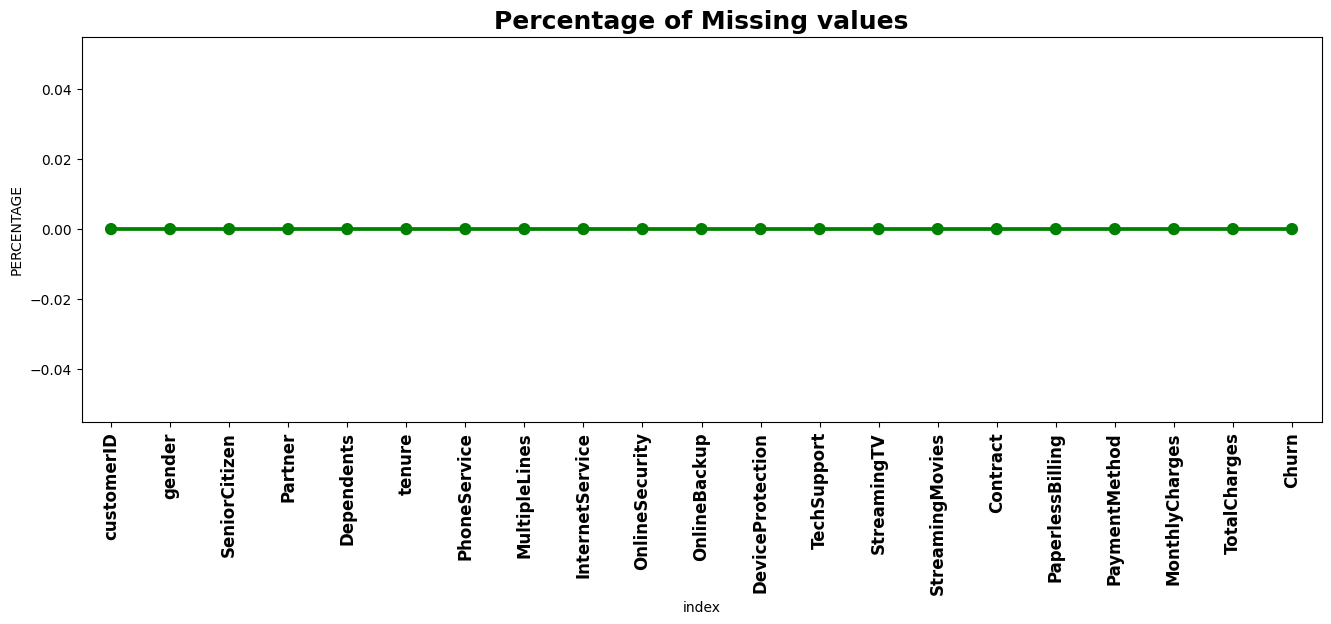

In [20]:

missing = pd.DataFrame((telco_base_data.isnull().sum()) * 100 / telco_base_data.shape[0]).reset_index()
plt.figure(figsize=(16, 5))
ax = sns.pointplot(x='index', y=0, data=missing, color='green')
plt.xticks(rotation=90, fontsize=12, fontweight='bold')  # Make x-axis labels bold
plt.title("Percentage of Missing values", fontsize=18, fontweight='bold')  # Make the title bold
plt.ylabel("PERCENTAGE")
plt.show()

In [21]:
tenure_counts = telco_base_data['tenure'].value_counts()
tenure_counts

tenure
1     613
72    362
2     238
3     200
4     176
     ... 
38     59
28     57
39     56
44     51
36     50
Name: count, Length: 72, dtype: int64

Divide customers into bins based on tenure e.g. for tenure < 12 months: assign a tenure group if 1-12, for tenure between 1 to 2 Yrs, tenure group of 13-24; so on...

In [22]:
# Get the max tenure
print(telco_base_data['tenure'].max()) #72

72


In [23]:
# Get the min tenure
print(telco_base_data['tenure'].min()) #1

1


In [24]:
# Group the tenure in bins of 12 months
labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)]

telco_base_data['tenure_group'] = pd.cut(telco_base_data.tenure, range(1, 80, 12), right=False, labels=labels)

In [25]:
telco_base_data['tenure_group'].value_counts()

tenure_group
1 - 12     2175
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: count, dtype: int64

6. Remove columns not required for processing

In [26]:
#drop column customerID and tenure
telco_base_data.drop(columns= ['customerID','tenure'], axis=1, inplace=True)
telco_base_data.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


In [27]:
telco = telco_base_data.copy()
telco
print(telco.info())

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   gender            7032 non-null   object  
 1   SeniorCitizen     7032 non-null   object  
 2   Partner           7032 non-null   object  
 3   Dependents        7032 non-null   object  
 4   PhoneService      7032 non-null   object  
 5   MultipleLines     7032 non-null   object  
 6   InternetService   7032 non-null   object  
 7   OnlineSecurity    7032 non-null   object  
 8   OnlineBackup      7032 non-null   object  
 9   DeviceProtection  7032 non-null   object  
 10  TechSupport       7032 non-null   object  
 11  StreamingTV       7032 non-null   object  
 12  StreamingMovies   7032 non-null   object  
 13  Contract          7032 non-null   object  
 14  PaperlessBilling  7032 non-null   object  
 15  PaymentMethod     7032 non-null   object  
 16  MonthlyCharges    7032 non-nu

### Outlier detection and treatment

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


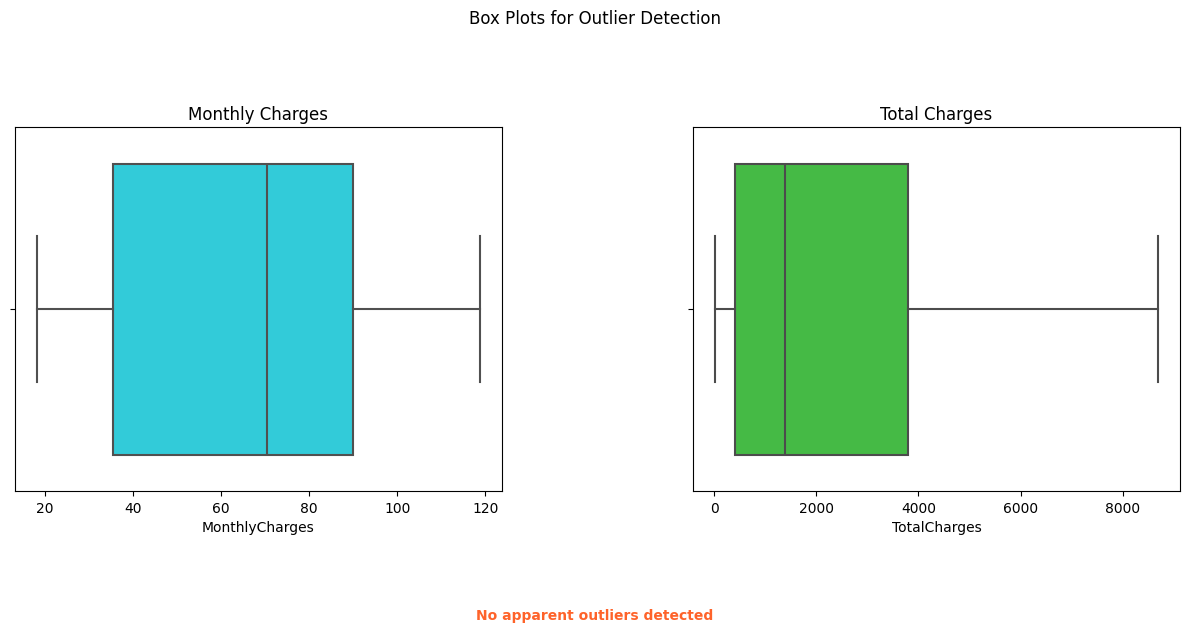

In [28]:

# Set the figure size
plt.figure(figsize=(12, 6))

# Heading
plt.suptitle("Box Plots for Outlier Detection")

# Box plot for 'MonthlyCharges'
plt.subplot(1, 2, 1)
sns.boxplot(x=telco['MonthlyCharges'], color='#16E2F5')
plt.title("Monthly Charges")

# Box plot for 'TotalCharges'
plt.subplot(1, 2, 2)
sns.boxplot(x=telco['TotalCharges'],color= '#32CD32')
plt.title("Total Charges")

# Remarks
plt.text(0.5, -0.03, "No apparent outliers detected", ha='center', va='center', transform=plt.gcf().transFigure, fontsize=10, color='#FE632A',weight='bold')

# Display the plots
plt.tight_layout(rect=[0, 0, 1, 0.9])  # Adjust layout to make space for the suptitle
plt.show()

In [29]:
#Identify potential outliers in the 'MonthlyCharges', and 'TotalCharges' columns using Z-scores.
from scipy.stats import zscore
import pandas as pd

# Calculate Z-scores for each column
z_scores = zscore(telco[[ 'MonthlyCharges', 'TotalCharges']])

# Create a DataFrame with Z-scores
z_scores_df = pd.DataFrame(z_scores, columns=['tenure', 'MonthlyCharges', 'TotalCharges'])

# Identify potential outliers (using a threshold, e.g., ±3)
outliers = (z_scores_df > 3) | (z_scores_df < -3)

# Print the rows where outliers are identified
print("Rows with potential outliers:")
print(telco[outliers.any(axis=1)])

Rows with potential outliers:
Empty DataFrame
Columns: [gender, SeniorCitizen, Partner, Dependents, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn, tenure_group]
Index: []


### There is no Outlier found with in the dataset.

In [30]:
#Export DataFrame to Excel
#telco.to_excel('telco.xlsx', index=False)

# Print information about the DataFrame (optional)
#print(telco.info())

## Data Exploration
**1. ** Plot distibution of individual predictors by churn

### Univariate Analysis

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) 

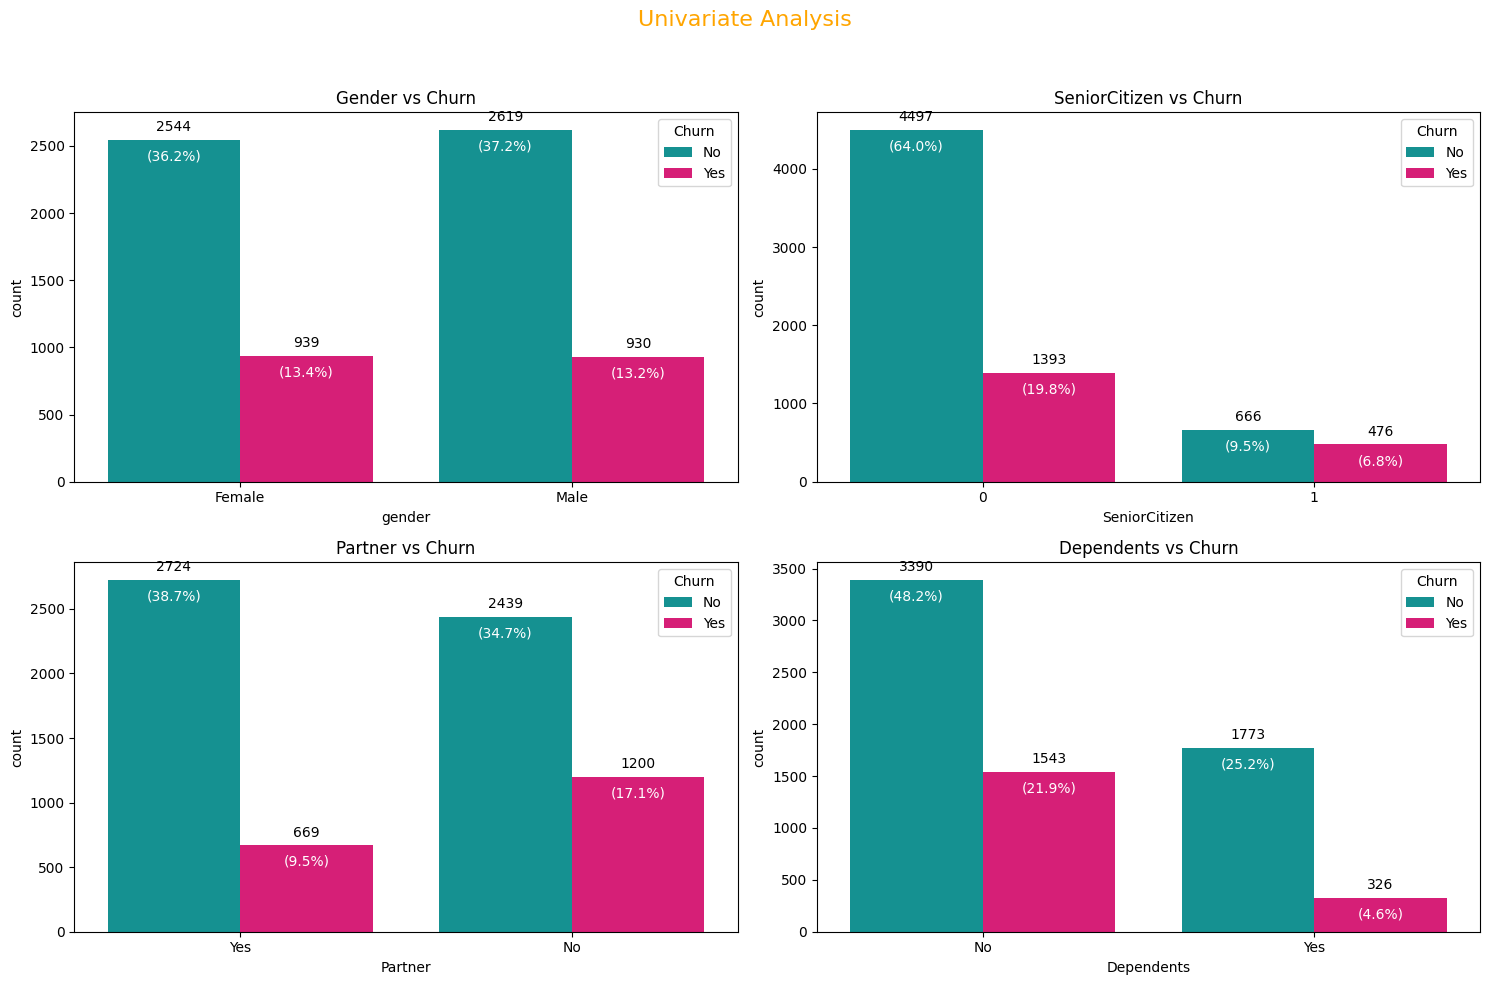

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Set up a 2x2 grid for subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Draw count plot for the 'gender' column with a custom color
sns.countplot(data=telco, x='gender', hue='Churn', palette=['#00A6A6', '#F40076'], ax=axes[0, 0])
axes[0, 0].set_title('Gender vs Churn')

total_height_gender = len(telco['gender'])  # Total number of observations

# Add counts and percentages inside the bars for Gender plot
for p in axes[0, 0].patches:
    count_value = int(p.get_height())
    percentage = f'{100 * count_value / total_height_gender:.1f}%'
    axes[0, 0].annotate(f'({percentage})', 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='center', xytext=(0, -12), textcoords='offset points', color='white')
    
    axes[0, 0].annotate(f'{count_value}', 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='bottom', xytext=(0, 4), textcoords='offset points')

# Draw count plot for the 'SeniorCitizen' column with a custom color
sns.countplot(data=telco, x='SeniorCitizen', hue='Churn', palette=['#00A6A6', '#F40076'], ax=axes[0, 1])
axes[0, 1].set_title('SeniorCitizen vs Churn')

total_height_senior = len(telco['SeniorCitizen'])  # Total number of observations

# Add counts and percentages inside the bars for SeniorCitizen plot
for p in axes[0, 1].patches:
    count_value = int(p.get_height())
    percentage = f'{100 * count_value / total_height_senior:.1f}%'
    axes[0, 1].annotate(f'({percentage})', 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='center', xytext=(0, -12), textcoords='offset points', color='white')
    
    axes[0, 1].annotate(f'{count_value}', 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='bottom', xytext=(0, 4), textcoords='offset points')

# Draw count plot for the 'Partner' column with a custom color
sns.countplot(data=telco, x='Partner', hue='Churn', palette=['#00A6A6', '#F40076'], ax=axes[1, 0])
axes[1, 0].set_title('Partner vs Churn')

total_height_partner = len(telco['Partner'])  # Total number of observations

# Add counts and percentages inside the bars for Partner plot
for p in axes[1, 0].patches:
    count_value = int(p.get_height())
    percentage = f'{100 * count_value / total_height_partner:.1f}%'
    axes[1, 0].annotate(f'({percentage})', 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='center', xytext=(0, -12), textcoords='offset points', color='white')
    
    axes[1, 0].annotate(f'{count_value}', 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='bottom', xytext=(0, 4), textcoords='offset points')

# Draw count plot for the 'Dependents' column with a custom color
sns.countplot(data=telco, x='Dependents', hue='Churn', palette=['#00A6A6', '#F40076'], ax=axes[1, 1])
axes[1, 1].set_title('Dependents vs Churn')

total_height_dependents = len(telco['Dependents'])  # Total number of observations

# Add counts and percentages inside the bars for Dependents plot
for p in axes[1, 1].patches:
    count_value = int(p.get_height())
    percentage = f'{100 * count_value / total_height_dependents:.1f}%'
    axes[1, 1].annotate(f'({percentage})', 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='center', xytext=(0, -12), textcoords='offset points', color='white')
    
    axes[1, 1].annotate(f'{count_value}', 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='bottom', xytext=(0, 4), textcoords='offset points')

# Set a common title for the set of plots
plt.suptitle('Univariate Analysis', fontsize=16, color='orange')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Show the plots
plt.show()



## Findings from the Above Distribution Plot 

### Gender 

- **Finding:** the gender of customers may not play a significant role in predicting churn rates. Additional factors should be considered for a more comprehensive analysis of customer churn in the telecommunications company.

### Senior Citizens

- **Finding:** Senior citizens are less likely to churn compared to non-senior customers.Further exploration of factors related to senior citizens and their telecom usage may provide additional insights into customer behavior and churn.

### Partner

- **Finding:** Customers without partners are churning more compared to customers with partners.Further investigation into factors related to customers with and without partners is recommended for a more nuanced understanding of customer behavior and churn.

### Dependents

- **Finding:** Customers without dependents are churning more compared to customers with dependents.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) 

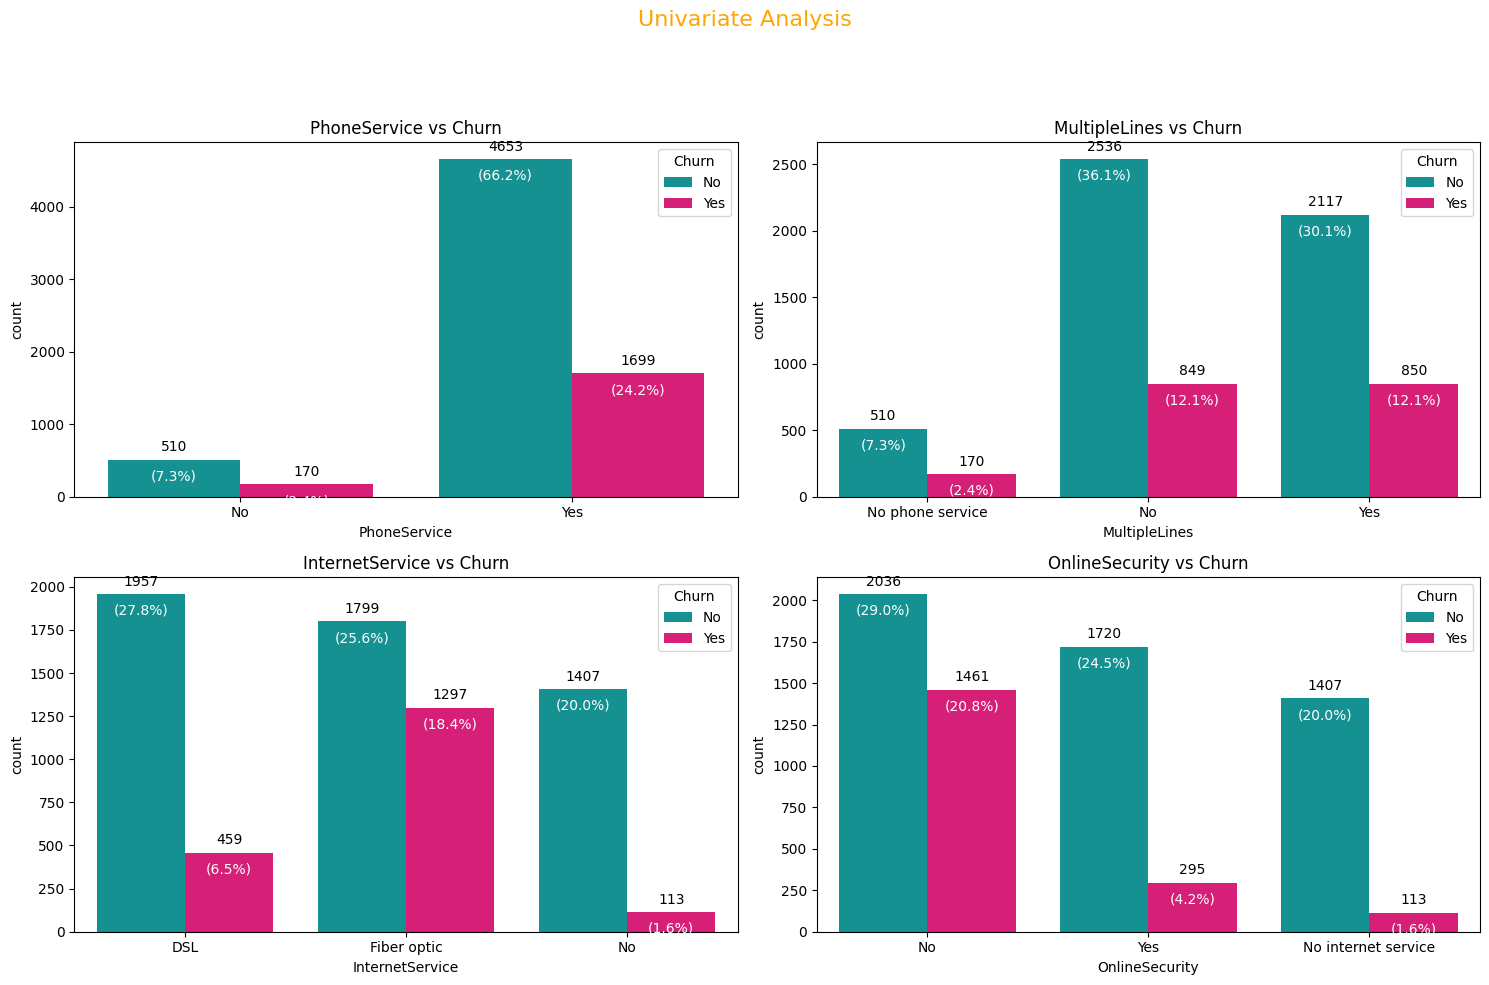

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Set up a 4x2 grid for subplots with an adjusted figure size
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# List of columns for analysis
columns_to_analyze = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity']

# Iterate over columns and create countplots
for i, column in enumerate(columns_to_analyze):
    row_index = i // 2
    col_index = i % 2
    
    # Draw count plot for the current column with a custom color
    sns.countplot(data=telco, x=column, hue='Churn', palette=['#00A6A6', '#F40076'], ax=axes[row_index, col_index])
    axes[row_index, col_index].set_title(f'{column} vs Churn')
    
    total_height_column = len(telco[column])  # Total number of observations

    # Add counts and percentages inside the bars
    for p in axes[row_index, col_index].patches:
        count_value = int(p.get_height())
        percentage = f'{100 * count_value / total_height_column:.1f}%'
        axes[row_index, col_index].annotate(f'({percentage})', 
                                             (p.get_x() + p.get_width() / 2., p.get_height()), 
                                             ha='center', va='center', xytext=(0, -12), textcoords='offset points', color='white')
        
        axes[row_index, col_index].annotate(f'{count_value}', 
                                             (p.get_x() + p.get_width() / 2., p.get_height()), 
                                             ha='center', va='bottom', xytext=(0, 4), textcoords='offset points')

# Set a common title for the set of plots
plt.suptitle('Univariate Analysis', fontsize=16, color='orange')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.92])  # Adjust the rect parameter to control the spacing

# Show the plots
plt.show()


## Findings from the Above Distribution Plot 

### Phone Service 

- **Finding:** The presence or absence of Phone Service alone may not be a strong predictor of customer churn.The presence or absence of Phone Service is a noteworthy predictor of customer churn. Customers without phone service exhibit a substantially lower churn rate, suggesting that the lack of phone service may be associated with higher customer retention.

### Multiple Lines

- **Finding:** Customers with multiple lines might have varying churn rates compared to those with a single line. Further analysis is needed to determine the impact.

### Fiber Optic:

- **Finding:** Customers using Fiber Optic services may have higher churn rates compared to other types of internet services.

### Online Security:
- **Finding:** Customers without online security features are churning more compared to those with secure online services.


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) 

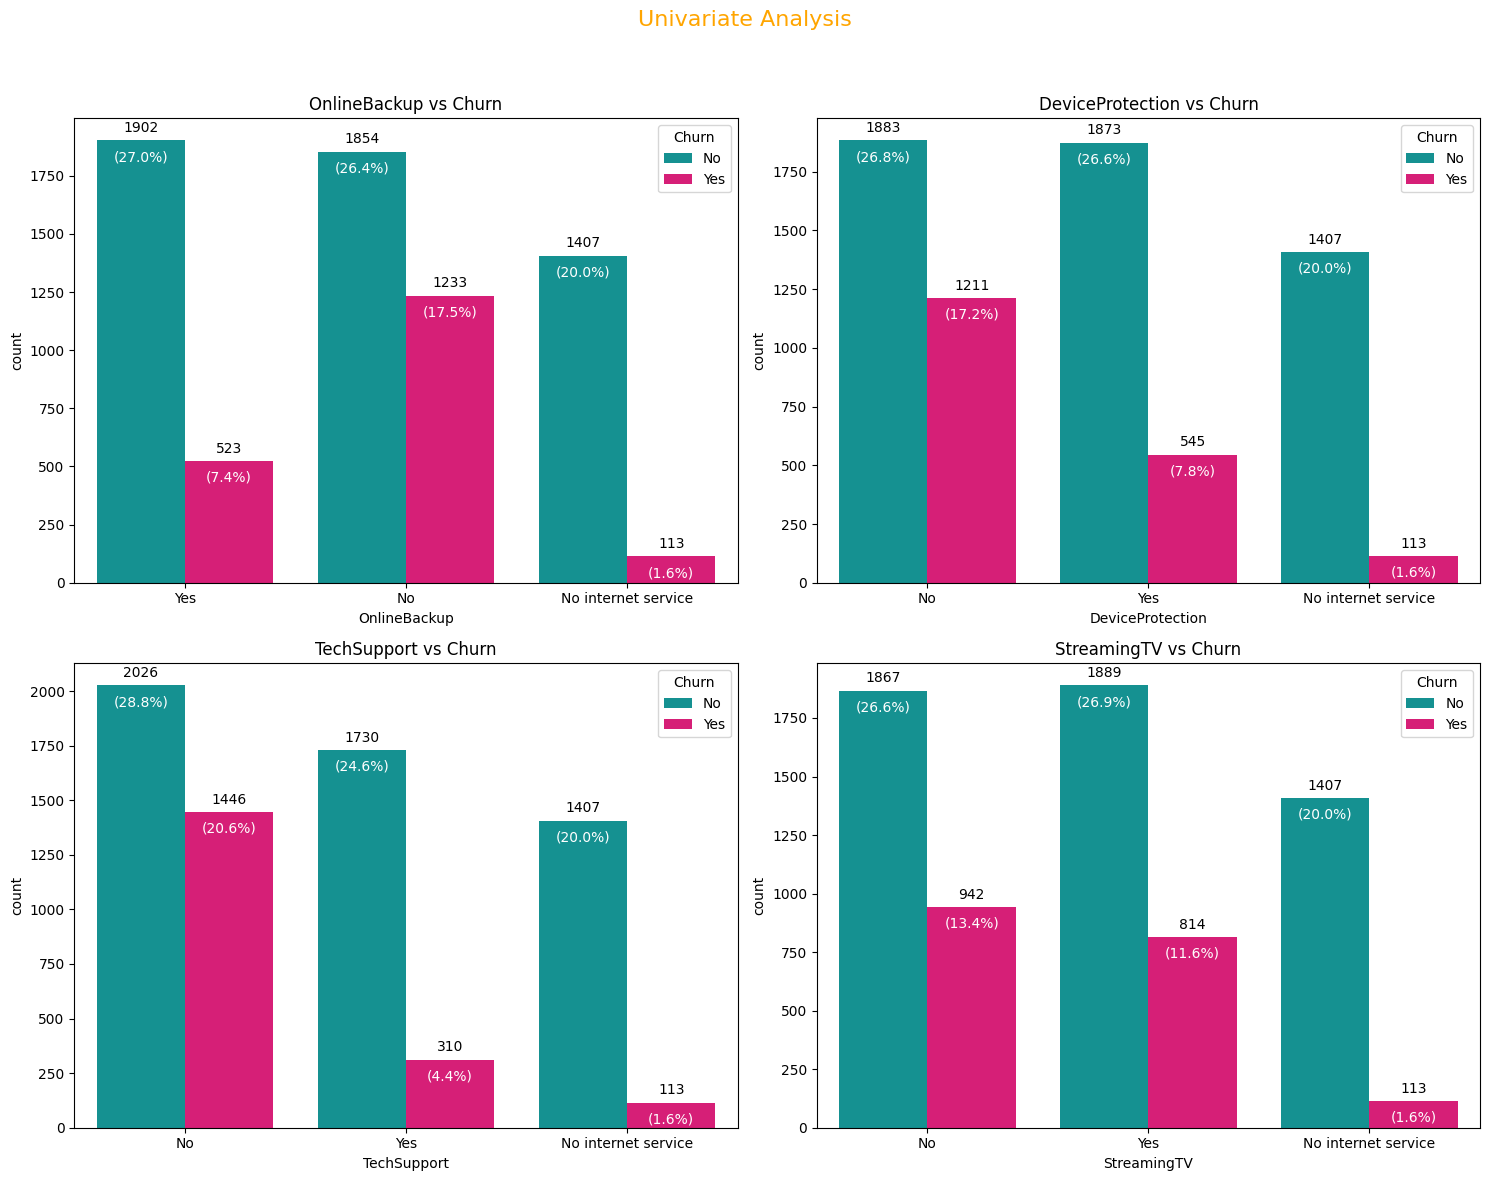

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Set up a 4x2 grid for subplots with an adjusted figure size
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# List of columns for analysis
columns_to_analyze = ['OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV']

# Iterate over columns and create countplots
for i, column in enumerate(columns_to_analyze):
    row_index = i // 2
    col_index = i % 2
    
    # Draw count plot for the current column with a custom color
    sns.countplot(data=telco, x=column, hue='Churn', palette=['#00A6A6', '#F40076'], ax=axes[row_index, col_index])
    axes[row_index, col_index].set_title(f'{column} vs Churn')
    
    total_height_column = len(telco[column])  # Total number of observations

    # Add counts and percentages inside the bars
    for p in axes[row_index, col_index].patches:
        count_value = int(p.get_height())
        percentage = f'{100 * count_value / total_height_column:.1f}%'
        axes[row_index, col_index].annotate(f'({percentage})', 
                                             (p.get_x() + p.get_width() / 2., p.get_height()), 
                                             ha='center', va='center', xytext=(0, -12), textcoords='offset points', color='white')
        
        axes[row_index, col_index].annotate(f'{count_value}', 
                                             (p.get_x() + p.get_width() / 2., p.get_height()), 
                                             ha='center', va='bottom', xytext=(0, 4), textcoords='offset points')

# Set a common title for the set of plots
plt.suptitle('Univariate Analysis', fontsize=16, color='orange')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Show the plots
plt.show()


## Findings from the Above Distribution Plot 

### Online Backup

- **Finding:** Customers without Online Security are churning more.The telecommunications company should consider promoting the benefits of online backup to customers as part of a strategy to potentially reduce churn rates.

### Device Protection

- **Finding:** the absence of Device Protection is associated with higher customer churn. It's important for the telecommunications company to consider strategies to encourage customers to opt for device protection services to potentially reduce churn rates.

### Tech Support

- **Finding:** Customers with no tech support are churning more.The customers with no internet service are churning the least.The telecommunications company should explore strategies to enhance tech support offerings to potentially reduce churn rates.

### Streaming TV

- **Finding:** the availability of Streaming TV services alone may not significantly influence customer churn. Further analysis considering additional factors is recommended to better understand the predictors of customer churn in the context of streaming TV services.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) 

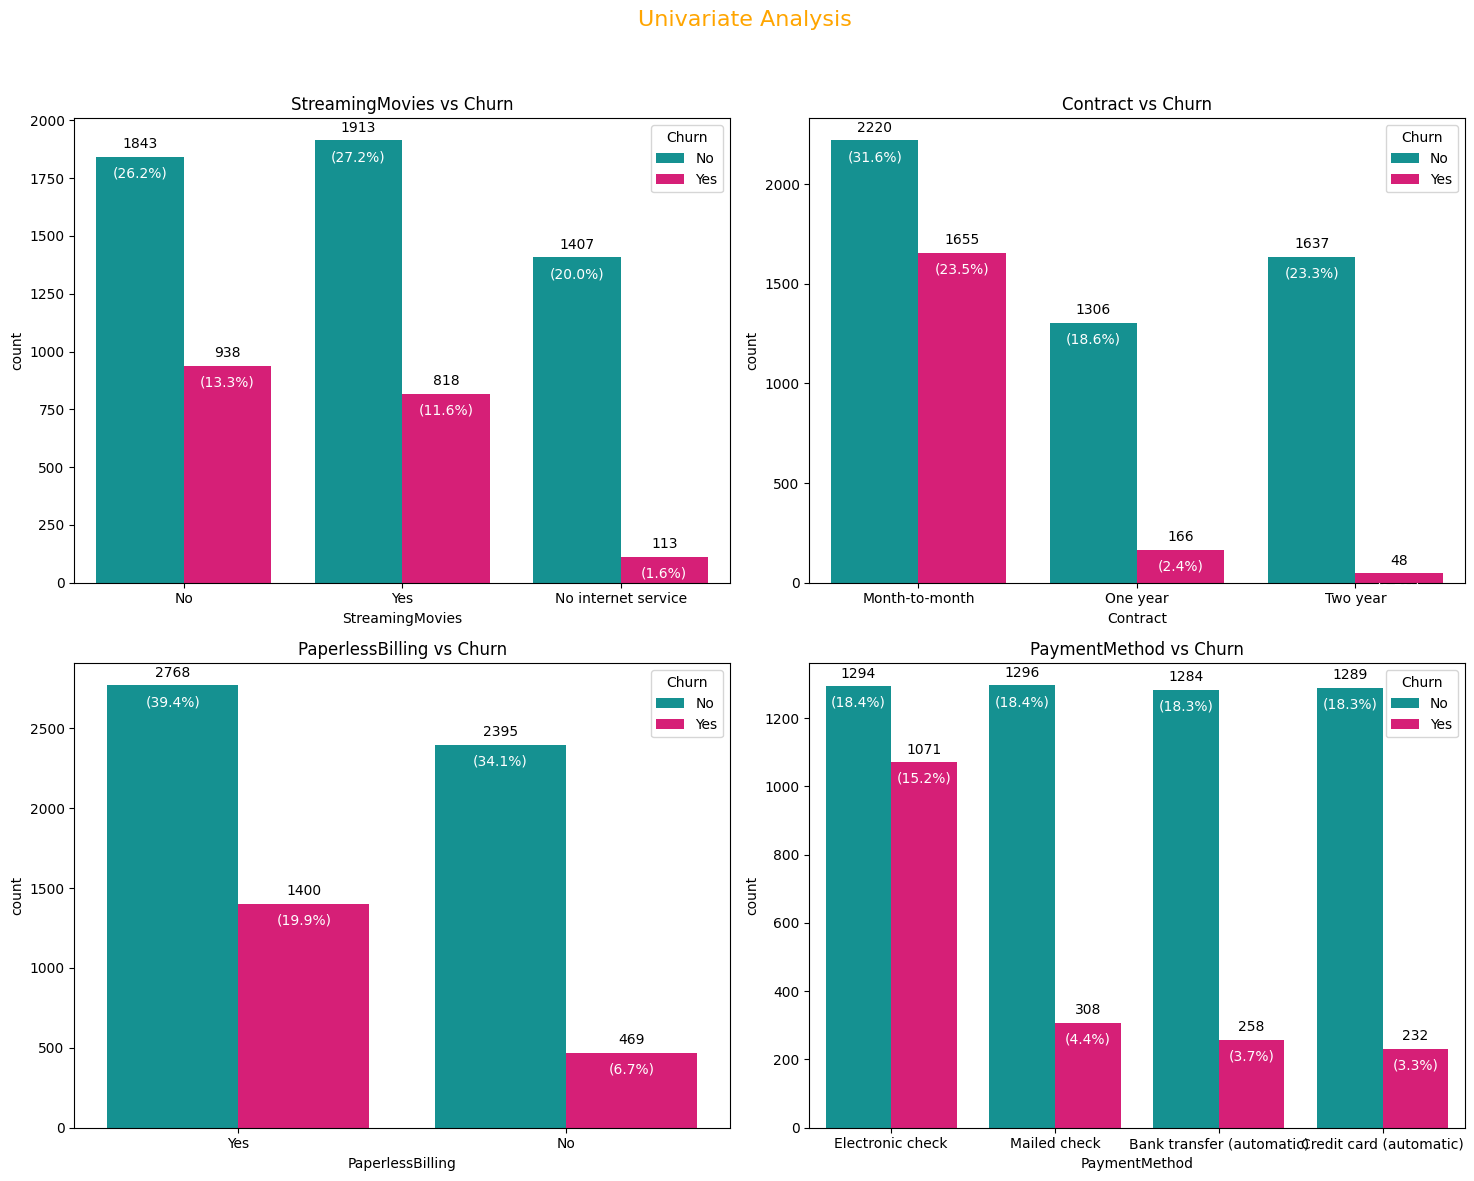

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Set up a 4x2 grid for subplots with an adjusted figure size
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# List of columns for analysis
columns_to_analyze = ['StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

# Iterate over columns and create countplots
for i, column in enumerate(columns_to_analyze):
    row_index = i // 2
    col_index = i % 2
    
    # Draw count plot for the current column with a custom color
    sns.countplot(data=telco, x=column, hue='Churn', palette=['#00A6A6', '#F40076'], ax=axes[row_index, col_index])
    axes[row_index, col_index].set_title(f'{column} vs Churn')
    
    total_height_column = len(telco[column])  # Total number of observations

    # Add counts and percentages inside the bars
    for p in axes[row_index, col_index].patches:
        count_value = int(p.get_height())
        percentage = f'{100 * count_value / total_height_column:.1f}%'
        axes[row_index, col_index].annotate(f'({percentage})', 
                                             (p.get_x() + p.get_width() / 2., p.get_height()), 
                                             ha='center', va='center', xytext=(0, -12), textcoords='offset points', color='white')
        
        axes[row_index, col_index].annotate(f'{count_value}', 
                                             (p.get_x() + p.get_width() / 2., p.get_height()), 
                                             ha='center', va='bottom', xytext=(0, 4), textcoords='offset points')

# Set a common title for the set of plots
plt.suptitle('Univariate Analysis', fontsize=16, color='orange')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Show the plots
plt.show()


## Findings from the Above Distribution Plot 

### Steaming Movies

- **Finding:** The presence or absence of Streaming Movies services alone may not be a strong predictor of customer churn.Further analysis considering additional factors is recommended to better understand the predictors of customer churn in the context of streaming movies services.

### Contract

- **Finding:** Customers with different contract types exhibit varying churn rates. Month to Month contract having higest Churn rate. Further exploration of contract-related factors is recommended to better understand and address customer churn in relation to different contract types.

### Paperless Billing

- **Finding:** Customers who use Paperless Billing are churning more in comparison to their counterparts.the choice of paperless billing may influence customer churn to some extent. Further investigation into factors related to paperless billing and customer behavior is recommended for a comprehensive understanding of its impact on churn rates.


### Payment Method

- **Finding:** Electronic check payment method having highest churn rate.These findings can help identify potential issues with payment methods and inform strategies to improve retention rates, such as offering discounts for customers who switch to electronic payment methods or improving the online billing process to reduce the likelihood of customers using mailed checks.


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is depreca

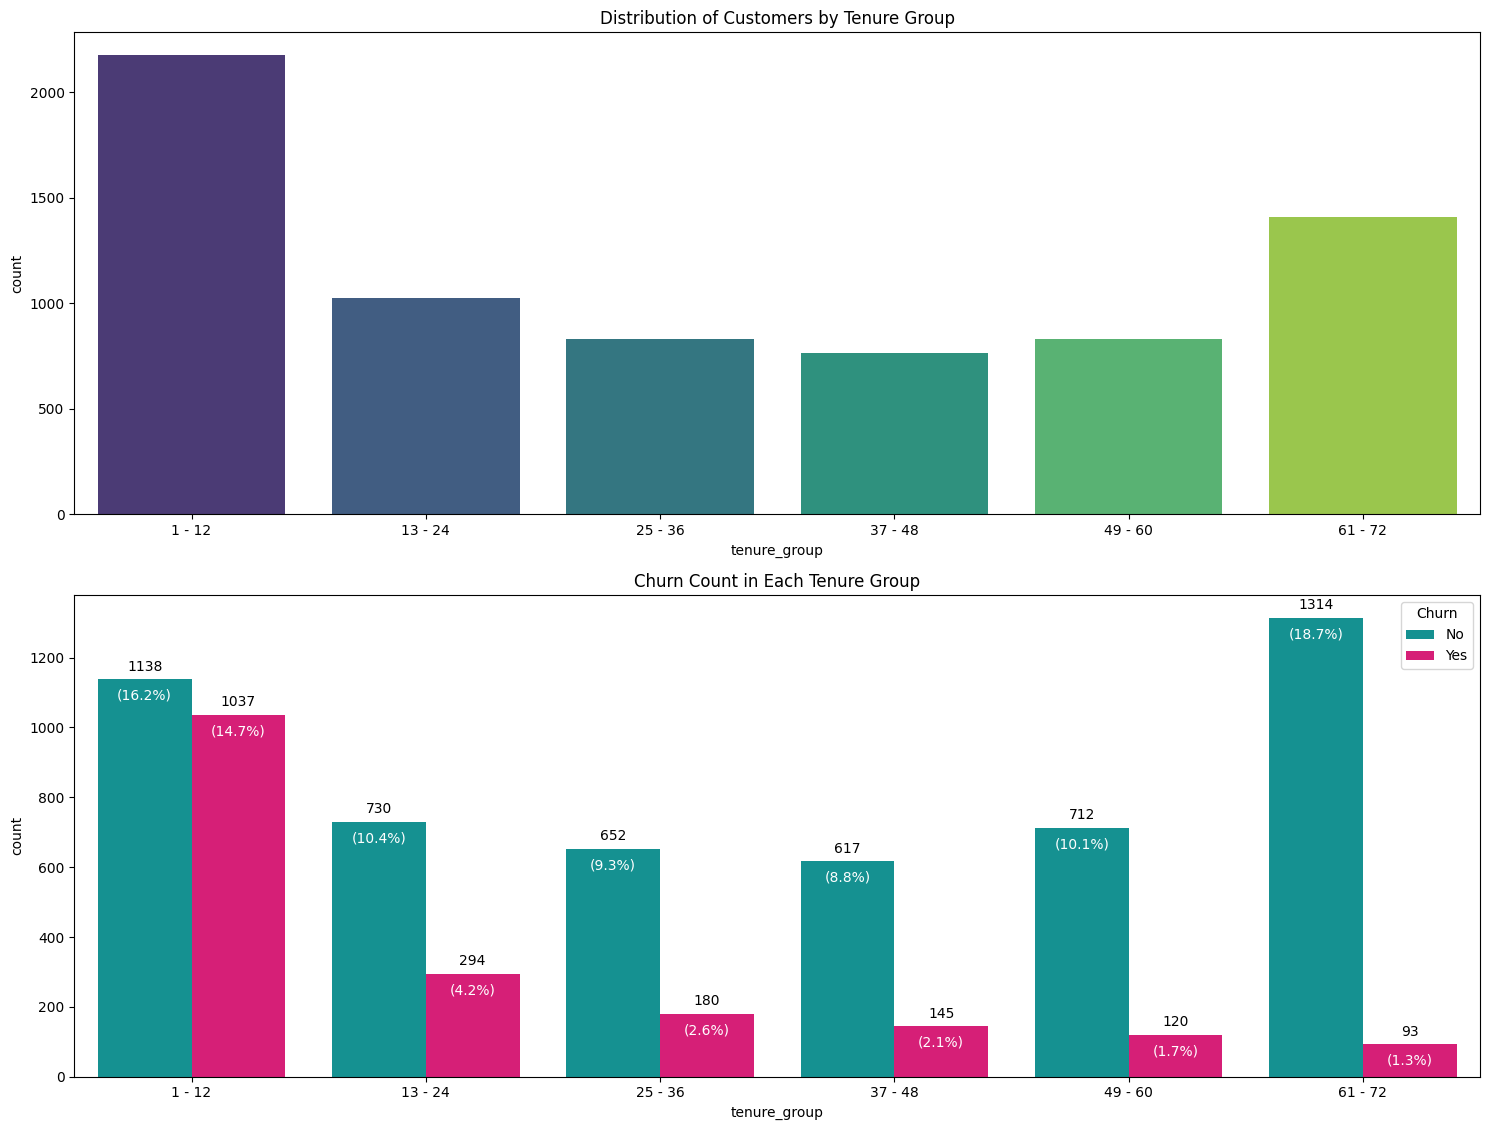

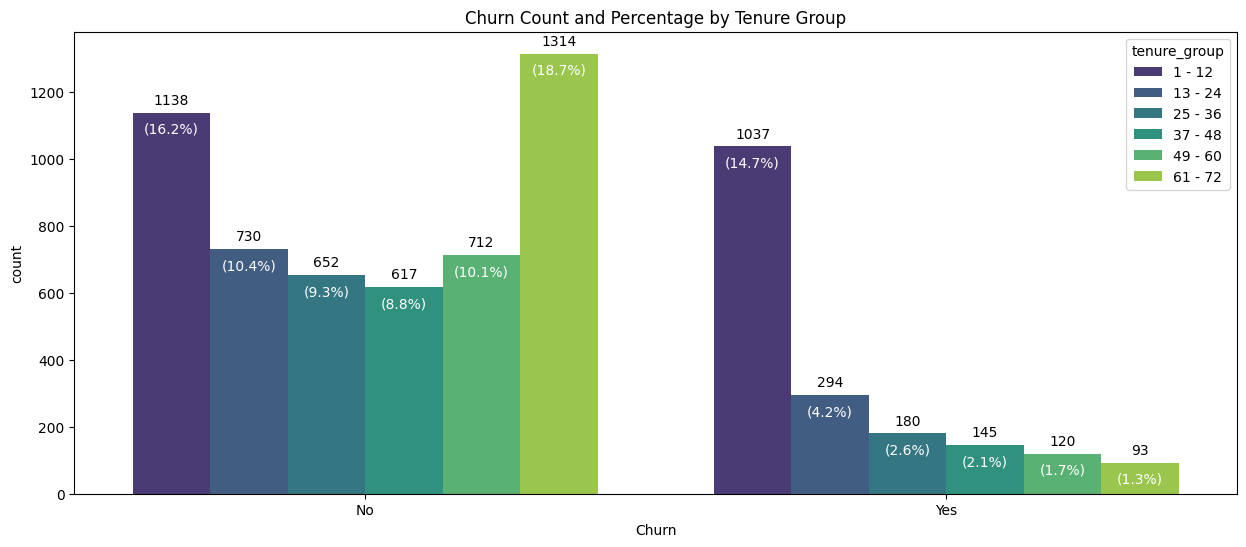

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Set up a 2x1 grid for subplots with an adjusted figure size
fig, axes = plt.subplots(2, 1, figsize=(15, 12))

# Plot 'tenure_group' distribution
sns.countplot(data=telco, x='tenure_group', ax=axes[0], palette='viridis')
axes[0].set_title('Distribution of Customers by Tenure Group')

# Plot 'Churn' count and percentage in each 'tenure_group'
sns.countplot(data=telco, x='tenure_group', hue='Churn', ax=axes[1], palette=['#00A6A6', '#F40076'])
axes[1].set_title('Churn Count in Each Tenure Group')

# Add counts and percentages inside the bars for 'Churn' plot
total_height_churn = len(telco['tenure_group'])  # Total number of observations
for p in axes[1].patches:
    count_value = int(p.get_height())
    percentage = f'{100 * count_value / total_height_churn:.1f}%'
    axes[1].annotate(f'({percentage})', 
                     (p.get_x() + p.get_width() / 2., p.get_height() if not pd.isna(p.get_height()) else 0), 
                     ha='center', va='center', xytext=(0, -12), textcoords='offset points', color='white')
    
    axes[1].annotate(f'{count_value}', 
                     (p.get_x() + p.get_width() / 2., p.get_height() if not pd.isna(p.get_height()) else 0), 
                     ha='center', va='bottom', xytext=(0, 4), textcoords='offset points')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Create a new figure for the combined plot
fig, axes_combined = plt.subplots(figsize=(15, 6))

# Plot 'Churn' count and percentage for the entire dataset
sns.countplot(data=telco, x='Churn', hue='tenure_group', palette='viridis', ax=axes_combined)

# Add counts and percentages inside the bars for the combined plot
total_height_combined = len(telco['Churn'])
for p in axes_combined.patches:
    count_value = int(p.get_height())
    percentage = f'{100 * count_value / total_height_combined:.1f}%'
    axes_combined.annotate(f'({percentage})', 
                           (p.get_x() + p.get_width() / 2., p.get_height()), 
                           ha='center', va='center', xytext=(0, -12), textcoords='offset points', color='white')
    
    axes_combined.annotate(f'{count_value}', 
                           (p.get_x() + p.get_width() / 2., p.get_height()), 
                           ha='center', va='bottom', xytext=(0, 4), textcoords='offset points')

plt.title('Churn Count and Percentage by Tenure Group')
plt.show()



## Findings from the Above Distribution Plot 

### Tenure

- **Finding:** Tenure groups of 1-12 and 13–24 are churning more which can be intuitively understood from the fact that teens and early 20s customers are changing their telecom services more frequently and thus are not so loyal customers 

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dell\AppData\Local\Temp\ipykernel_37040\224239934.py:16: UserWarning: Ignoring `palette` because no `hue` variable ha

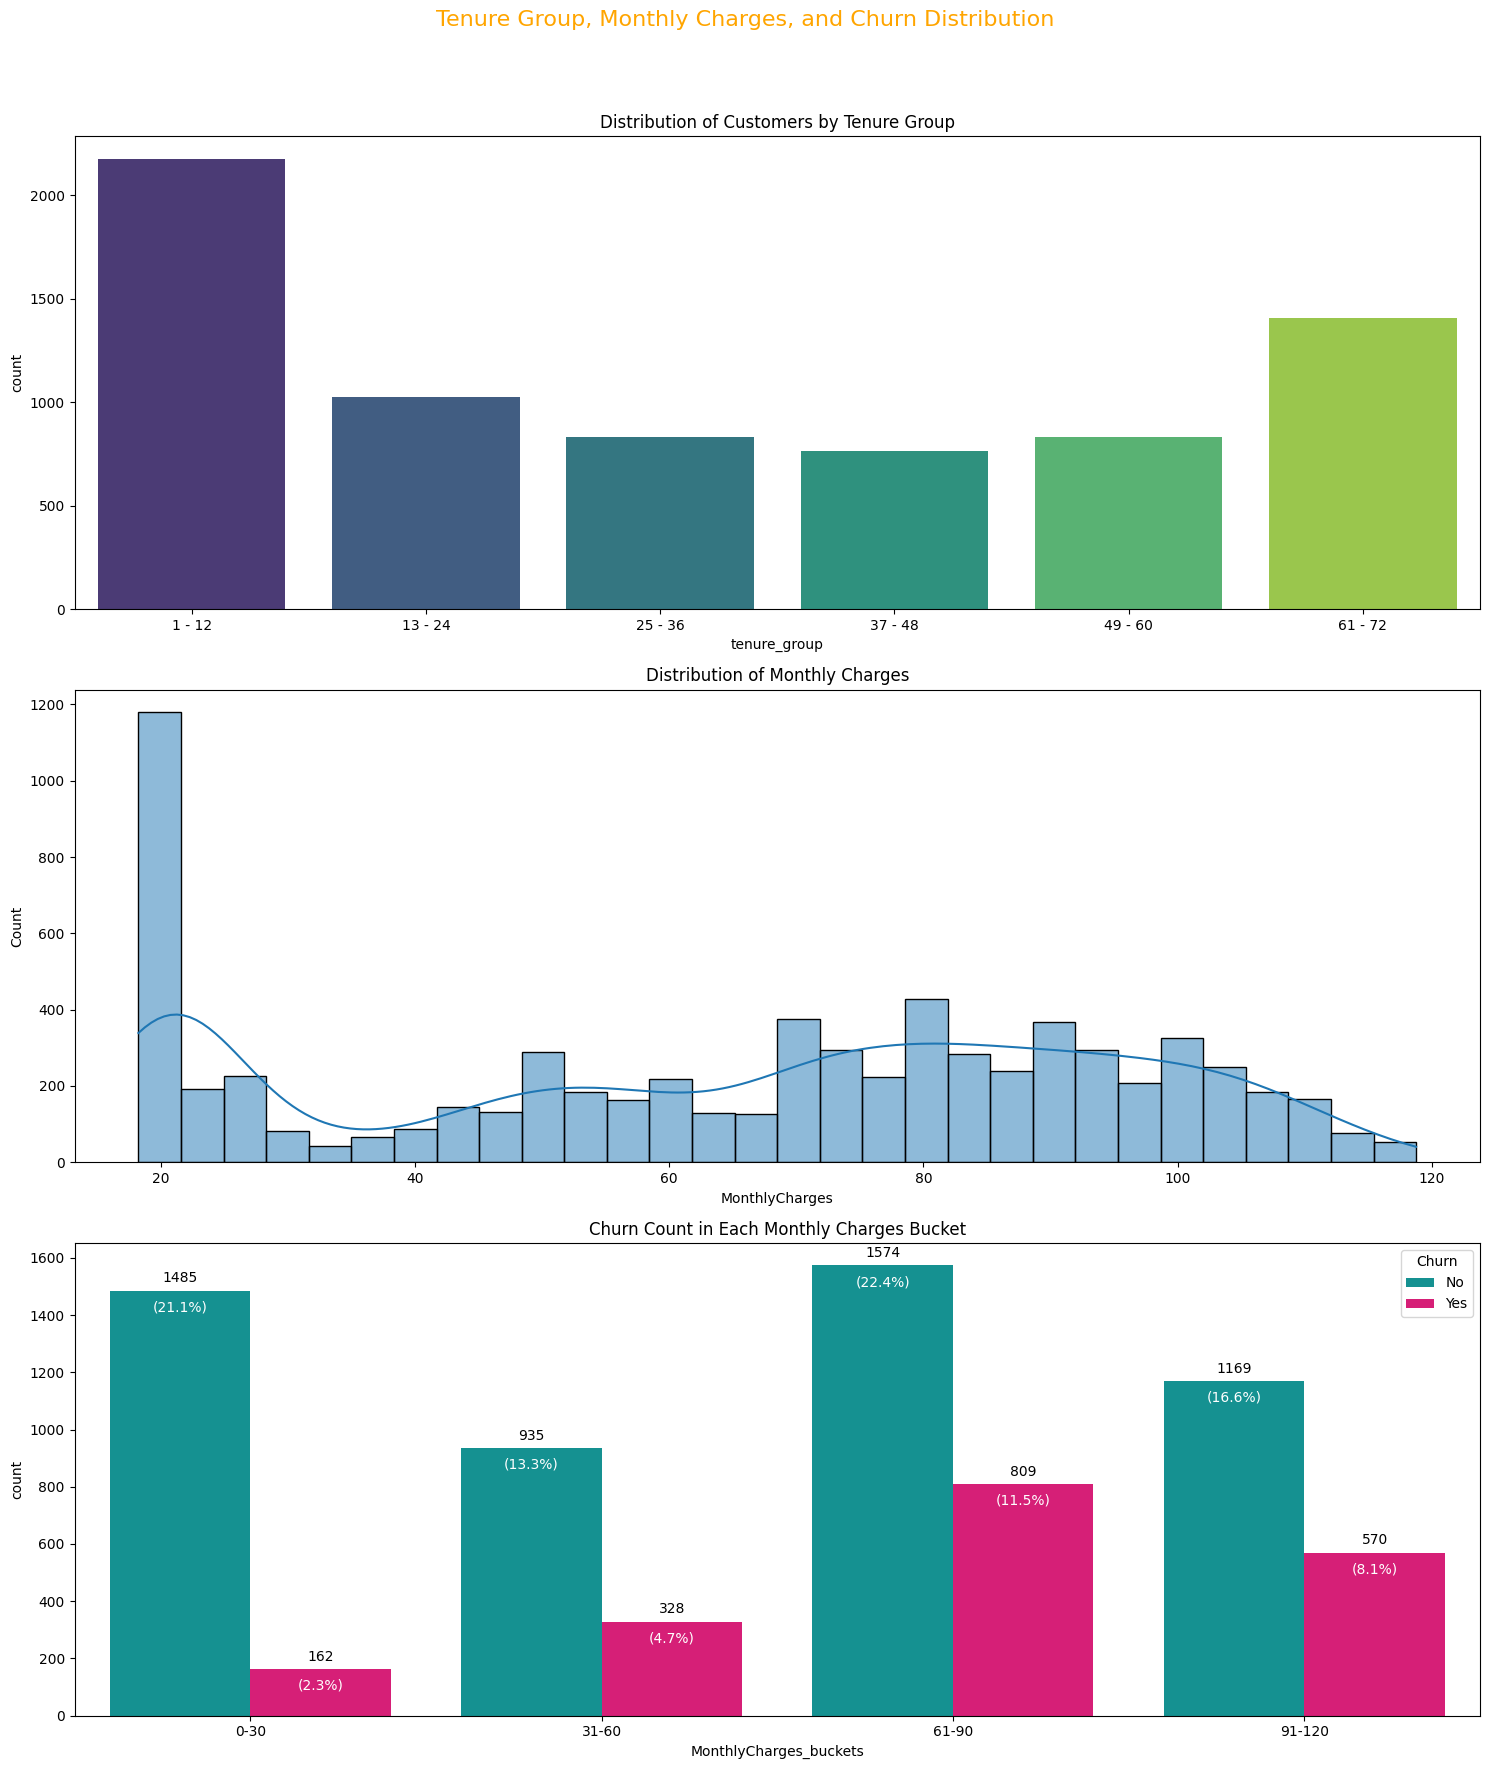

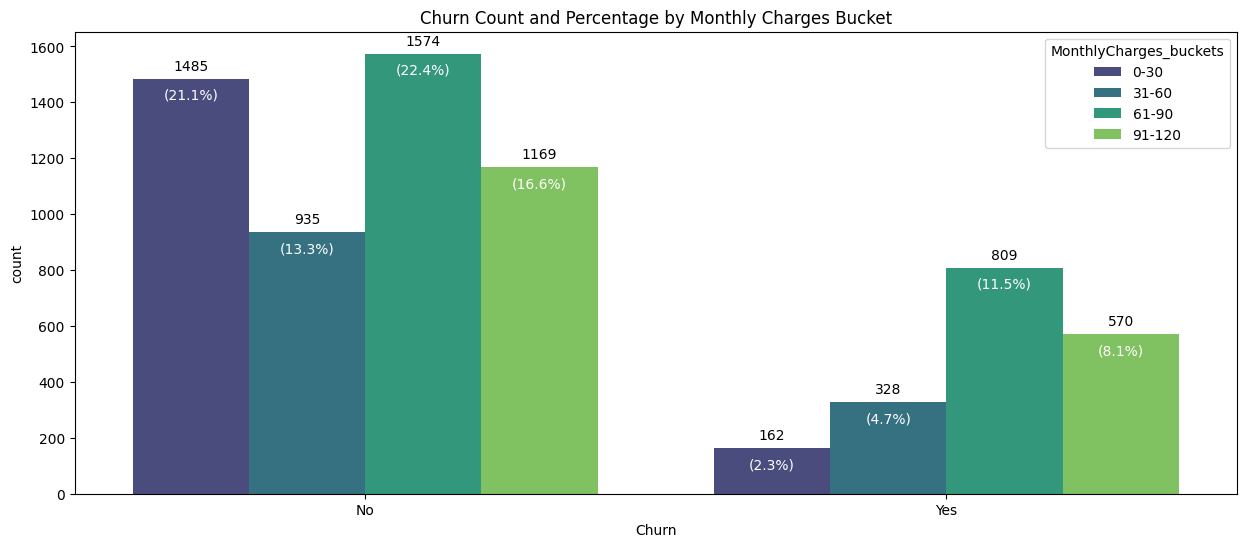

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Create bins for 'MonthlyCharges'
telco['MonthlyCharges_buckets'] = pd.cut(telco['MonthlyCharges'], bins=[0, 30, 60, 90, 120], labels=['0-30', '31-60', '61-90', '91-120'])

# Set up a 3x1 grid for subplots with an adjusted figure size
fig, axes = plt.subplots(3, 1, figsize=(15, 18))

# Plot 'tenure_group' distribution
sns.countplot(data=telco, x='tenure_group', ax=axes[0], palette='viridis')
axes[0].set_title('Distribution of Customers by Tenure Group')

# Plot 'MonthlyCharges' distribution
sns.histplot(data=telco, x='MonthlyCharges', ax=axes[1], bins=30, kde=True, palette='magma')
axes[1].set_title('Distribution of Monthly Charges')

# Plot 'Churn' count and percentage in each 'MonthlyCharges_buckets' bin
sns.countplot(data=telco, x='MonthlyCharges_buckets', hue='Churn', ax=axes[2], palette=['#00A6A6', '#F40076'])
axes[2].set_title('Churn Count in Each Monthly Charges Bucket')

# Add counts and percentages inside the bars for 'Churn' plot
total_height_churn = len(telco['MonthlyCharges_buckets'])  # Total number of observations
for p in axes[2].patches:
    count_value = int(p.get_height())
    percentage = f'{100 * count_value / total_height_churn:.1f}%'
    axes[2].annotate(f'({percentage})', 
                     (p.get_x() + p.get_width() / 2., p.get_height() if not pd.isna(p.get_height()) else 0), 
                     ha='center', va='center', xytext=(0, -12), textcoords='offset points', color='white')
    
    axes[2].annotate(f'{count_value}', 
                     (p.get_x() + p.get_width() / 2., p.get_height() if not pd.isna(p.get_height()) else 0), 
                     ha='center', va='bottom', xytext=(0, 4), textcoords='offset points')

# Set a common title for the set of plots
plt.suptitle('Tenure Group, Monthly Charges, and Churn Distribution', fontsize=16, color='orange')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Combine the three plots into a single stacked bar chart
fig, axes_combined = plt.subplots(figsize=(15, 6))

# Plot 'Churn' count and percentage for the entire dataset
sns.countplot(data=telco, x='Churn', hue='MonthlyCharges_buckets', palette='viridis', ax=axes_combined)

# Add counts and percentages inside the bars for the combined plot
total_height_combined = len(telco['Churn'])
for p in axes_combined.patches:
    count_value = int(p.get_height())
    percentage = f'{100 * count_value / total_height_combined:.1f}%'
    axes_combined.annotate(f'({percentage})', 
                           (p.get_x() + p.get_width() / 2., p.get_height()), 
                           ha='center', va='center', xytext=(0, -12), textcoords='offset points', color='white')
    
    axes_combined.annotate(f'{count_value}', 
                           (p.get_x() + p.get_width() / 2., p.get_height()), 
                           ha='center', va='bottom', xytext=(0, 4), textcoords='offset points')

plt.title('Churn Count and Percentage by Monthly Charges Bucket')
plt.show()


## Findings from the Above Distribution Plot 

### Monthly Charges

- **Finding:** Higher Monthly Charges combined with lower tenure tend to result in higher churn.

#### Convert 'Churn' Column to Numerical Values: Assign 1 for 'Yes' and 0 for 'No'"

In [37]:
telco['Churn'] = np.where(telco.Churn == 'Yes',1,0)

In [38]:
telco.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group,MonthlyCharges_buckets
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1 - 12,0-30
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,...,No,No,One year,No,Mailed check,56.95,1889.50,0,25 - 36,31-60
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1 - 12,31-60
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37 - 48,31-60
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1 - 12,61-90


In [39]:
#telco['tenure_group'].unique()

### 3.Convert all the categorical variables into dummy variables

In [40]:
telco_dummies = pd.get_dummies(telco).astype(int)
telco_dummies.head()

,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,...,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72,MonthlyCharges_buckets_0-30,MonthlyCharges_buckets_31-60,MonthlyCharges_buckets_61-90,MonthlyCharges_buckets_91-120
0,29,29,0,1,0,1,0,0,1,1,...,1,0,0,0,0,0,1,0,0,0
1,56,1889,0,0,1,1,0,1,0,1,...,0,0,1,0,0,0,0,1,0,0
2,53,108,1,0,1,1,0,1,0,1,...,1,0,0,0,0,0,0,1,0,0
3,42,1840,0,0,1,1,0,1,0,1,...,0,0,0,1,0,0,0,1,0,0
4,70,151,1,1,0,1,0,1,0,1,...,1,0,0,0,0,0,0,0,1,0


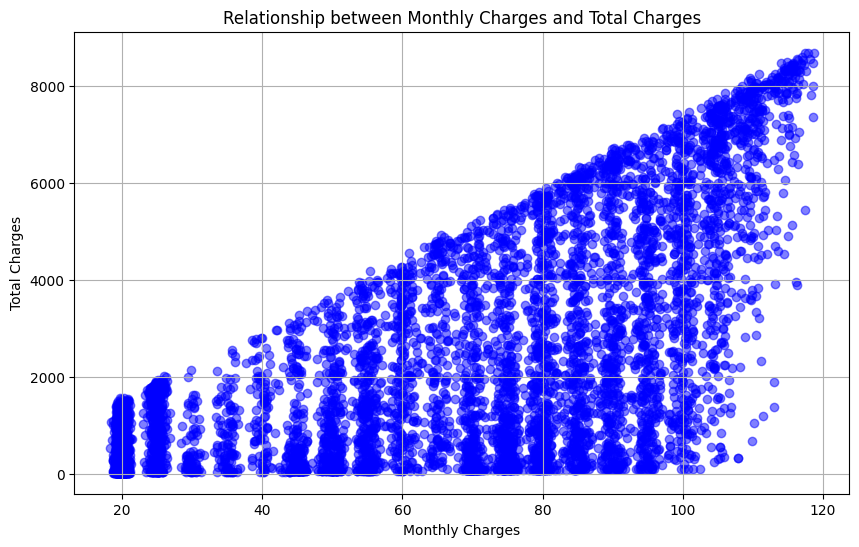

In [41]:
import matplotlib.pyplot as plt

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(telco['MonthlyCharges'], telco_dummies['TotalCharges'], color='Blue', alpha=0.5)
plt.title('Relationship between Monthly Charges and Total Charges')
plt.xlabel('Monthly Charges')
plt.ylabel('Total Charges')
plt.grid(True)
plt.show()

Total Charges increase as Monthly Charges increase - as expected.

###  5.Churn by Monthly Charges

In [42]:
telco_dummies = pd.get_dummies(telco)
telco_dummies.head()

,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,...,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72,MonthlyCharges_buckets_0-30,MonthlyCharges_buckets_31-60,MonthlyCharges_buckets_61-90,MonthlyCharges_buckets_91-120
0,29.85,29.85,0,True,False,True,False,False,True,True,...,True,False,False,False,False,False,True,False,False,False
1,56.95,1889.50,0,False,True,True,False,True,False,True,...,False,False,True,False,False,False,False,True,False,False
2,53.85,108.15,1,False,True,True,False,True,False,True,...,True,False,False,False,False,False,False,True,False,False
3,42.30,1840.75,0,False,True,True,False,True,False,True,...,False,False,False,True,False,False,False,True,False,False
4,70.70,151.65,1,True,False,True,False,True,False,True,...,True,False,False,False,False,False,False,False,True,False


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

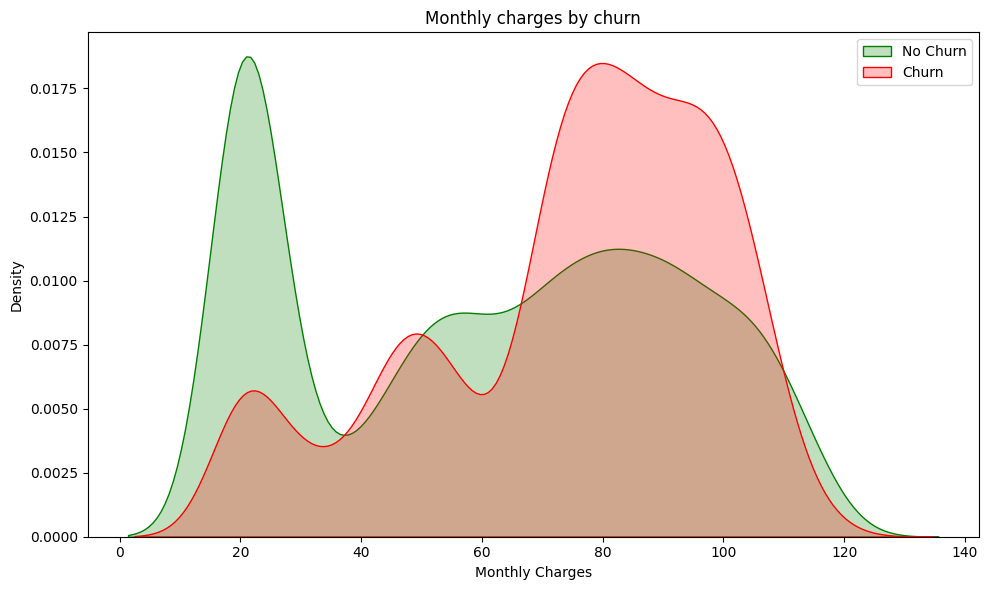

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Kernel Density Plot
Mth = sns.kdeplot(telco_dummies.MonthlyCharges[(telco_dummies["Churn"] == 0)],
                  color="Green", fill=True, ax=ax, label="No Churn")

Mth = sns.kdeplot(telco_dummies.MonthlyCharges[(telco_dummies["Churn"] == 1)],
                  color="Red", fill=True, ax=Mth, label="Churn")

# Legend
ax.legend(["No Churn", "Churn"])

# Labels and Title
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('Monthly charges by churn')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

##### <span style="color:Red;">Insight: Churn is high when Monthly Charges ar high

  Certainly! Here's a summary of the insights and implications for telecom customer churn analysis:

1. Price sensitivity: Higher monthly charges may lead to increased churn if customers perceive the value received as insufficient or overpriced.
2. Competitive alternatives: Customers may switch to cheaper alternatives if they perceive that their current provider's prices are too high.
3. Billing transparency: Unexpected or unjustified price hikes can lead to mistrust and increased churn.
4. Service value: The value provided by the service must justify the price point to retain customers.
5. Customer segmentation: Not all customers are equally sensitive to price increases, so a nuanced approach to pricing and retention strategies is necessary.
6. Retention strategies: Personalized retention strategies can help reduce churn among high-paying customers.
7. Market positioning: If a company is positioned as a value provider, high charges can misalign with the brand and cause customers to leave.
8. Financial stress: Larger bills can lead to financial strain for customers, which can be a practical driver of churn.


###  6.Churn by Total Charges

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

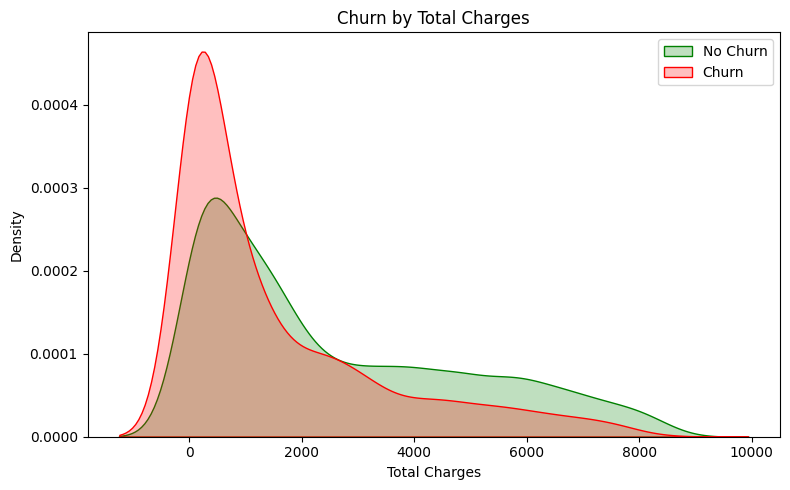

In [44]:
# Set up the figure and axes
fig, ax = plt.subplots(figsize=(8, 5))

# Kernel Density Plot for Total Charges
total_charges_plot = sns.kdeplot(telco_dummies['TotalCharges'][(telco_dummies['Churn'] == 0)],
                                 color='Green', fill=True, ax=ax, label='No Churn')

total_charges_plot = sns.kdeplot(telco_dummies['TotalCharges'][(telco_dummies['Churn'] == 1)],
                                 color='Red', fill=True, ax=total_charges_plot, label='Churn')

# Legend
ax.legend(['No Churn', 'Churn'])

# Labels and Title
ax.set_ylabel('Density')
ax.set_xlabel('Total Charges')
ax.set_title('Churn by Total Charges')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


##### <span style="color:Red;">Insight:higher Churn at lower Total Charges

In telecom customer churn analysis, the phenomenon of higher churn rate at lower charges can be attributed to several factors. Let’s explore this in more detail:

Monthly Charges and Total Charges Relationship:

When analyzing customer churn, we often consider factors such as tenure, monthly charges, and total charges.
Higher monthly charges can lead to lower tenure (i.e., shorter duration of service), which in turn results in lower total charges.
Here’s how these three factors are linked:
Higher Monthly Charge: Customers who pay higher monthly charges may find it expensive or less sustainable over time.
Lower Tenure: New customers or those with shorter tenure are more likely to churn because they haven’t yet established a long-term relationship with the telecom provider.
Lower Total Charge: Since tenure is shorter, the cumulative total charges (over the entire period) are lower for these customers.
Therefore, the combination of higher monthly charges and lower tenure contributes to a higher churn rate.

### Build a corelation of all predictors with 'Churn'

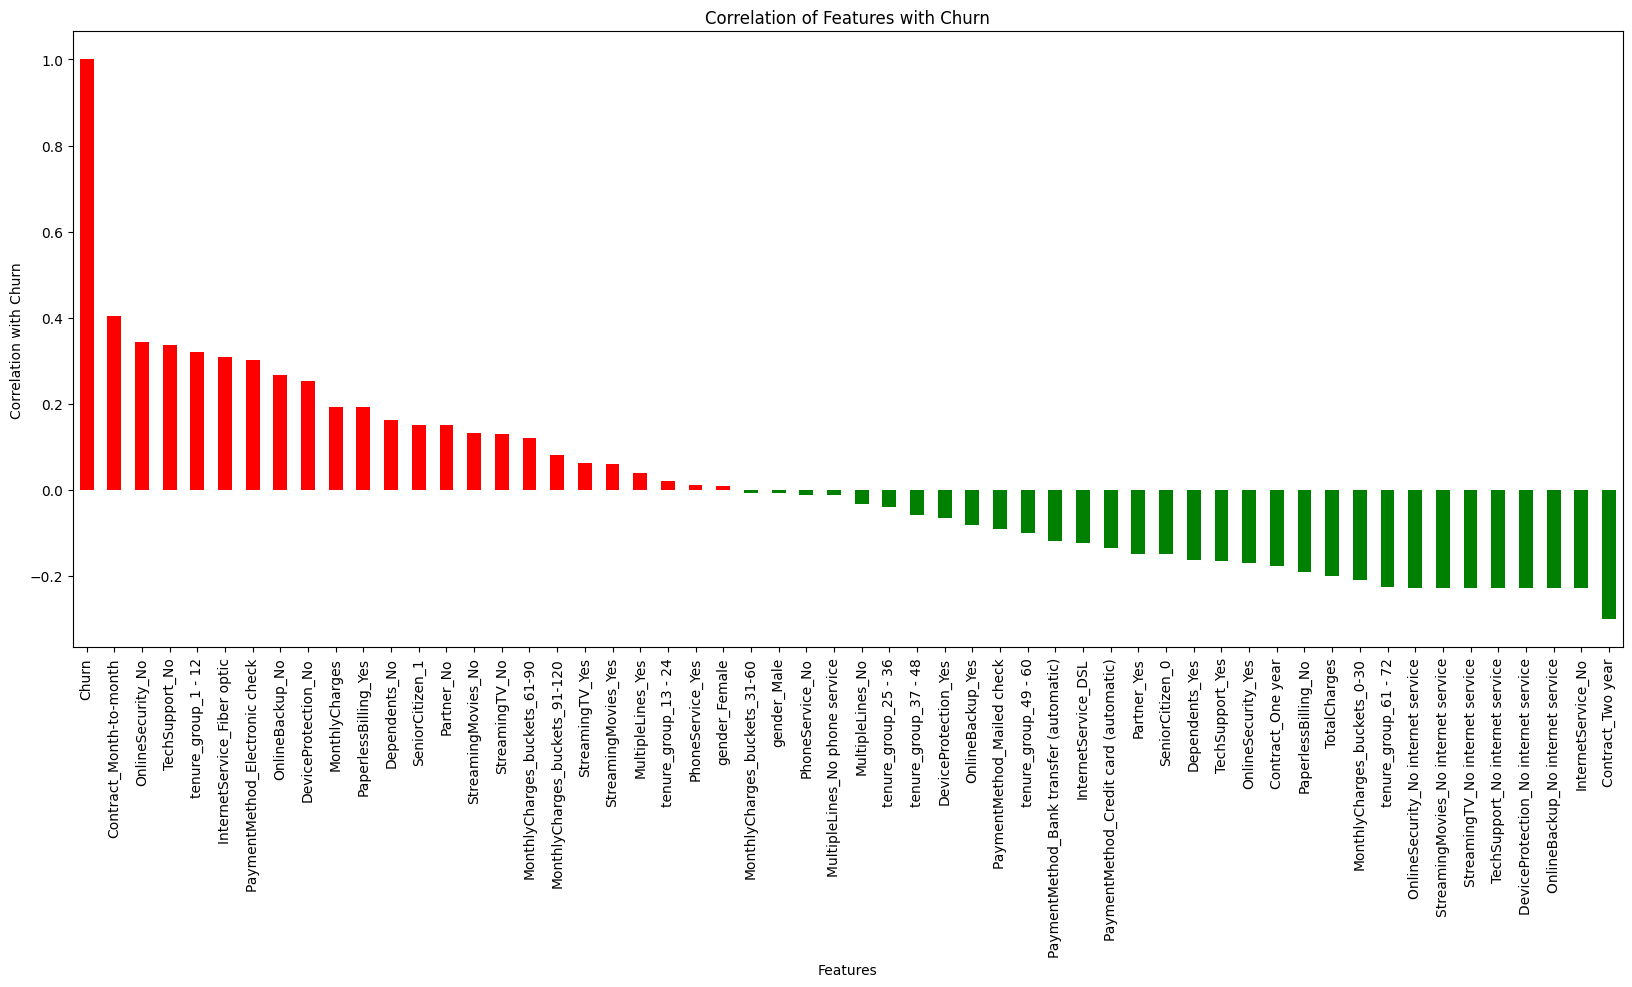

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.figure(figsize=(20, 8))

# Calculate correlation and sort by values
correlation_data = telco_dummies.corr()['Churn'].sort_values(ascending=False)

# Define colors for positive and negative correlations
colors = ['red' if corr > 0 else 'green' for corr in correlation_data]

# Create a bar plot
correlation_data.plot(kind='bar', color=colors)

# Set labels and title
plt.xlabel('Features')
plt.ylabel('Correlation with Churn')
plt.title('Correlation of Features with Churn')

# Show the plot
plt.show()


## Derived Insight:

- **HIGH Churn**
it is seen in case of **Month to month contracts, No online security, No Tech support, First year of subscription** and **Fibre Optics Internet**

- **LOW Churn** 
it is seens in case of **Long term contracts, Subscriptions without internet service** and **The customers engaged for 5+ years**

- **No impart** 
Factors like **Gender, Availability of PhoneService** and **of multiple lines** have alomost **No impact on Churn**

In [46]:
from tabulate import tabulate

# Calculate correlation and sort by values in descending order
correlation_data = telco_dummies.corr()['Churn'].sort_values(ascending=False)

# Create a list of tuples for tabulate
table_data = [(feature, round(correlation, 4), f"{round((correlation * 100), 4)}%") for feature, correlation in correlation_data.items()]

# Add a header to the table
headers = ["Feature", "Correlation", "Correlation (%)"]

# Print the table
print(tabulate(table_data, headers=headers, tablefmt="pretty"))

# Print the total number of features
print(f"Total Features: {len(correlation_data)}")


+-----------------------------------------+-------------+-----------------+
|                 Feature                 | Correlation | Correlation (%) |
+-----------------------------------------+-------------+-----------------+
|                  Churn                  |     1.0     |     100.0%      |
|         Contract_Month-to-month         |   0.4046    |    40.4565%     |
|            OnlineSecurity_No            |   0.3422    |    34.2235%     |
|             TechSupport_No              |   0.3369    |    33.6877%     |
|           tenure_group_1 - 12           |   0.3196    |    31.9628%     |
|       InternetService_Fiber optic       |   0.3075    |    30.7463%     |
|     PaymentMethod_Electronic check      |   0.3015    |    30.1455%     |
|             OnlineBackup_No             |   0.2676    |    26.7595%     |
|           DeviceProtection_No           |   0.2521    |    25.2056%     |
|             MonthlyCharges              |   0.1929    |    19.2858%     |
|          P

## the correlation matrix for **telco customer churn**:


 - **1.Each feature's correlation coefficient indicates how closely it is associated with customer churn.
 - **Let's highlight a few interesting ones:
#### Contract_Month-to-month**: 

- **Finding:** Customers with month-to-month contracts have a **40.46%** positive correlation with churn. These customers might be more likely to leave.

#### OnlineSecurity_No** and **TechSupport_No**: 

- **Finding:** Customers without online security or tech support services have a **34.22%** and **33.69%** positive correlation with churn, respectively.

#### InternetService_Fiber optic**: 

- **Finding:** Customers using fiber optic internet services have a **30.75%** positive correlation with churn.

#### PaymentMethod_Electronic check**: 

- **Finding:** Customers using electronic checks for payment have a **30.15%** positive correlation with churn.
        
#### MonthlyCharges**:

- **Finding:** Monthly charges have a **19.29%** positive correlation with churn.

#### PaperlessBilling_Yes**: 

- **Finding:** Customers with paperless billing have a **19.15%** positive correlation with churn.

#### SeniorCitizen_1**: 

- **Finding:** Senior citizens (coded as 1) have a **15.05%** positive correlation with churn.

#### StreamingMovies_Yes** and **StreamingTV_Yes**: 

- **Finding:**  Customers using streaming services have a **6.09%** and **6.33%** positive correlation with churn, respectively.

2. **Interpretation**:
- ** **  High positive correlations suggest that certain features are associated with an increased likelihood of churn.
    
   




<Axes: >

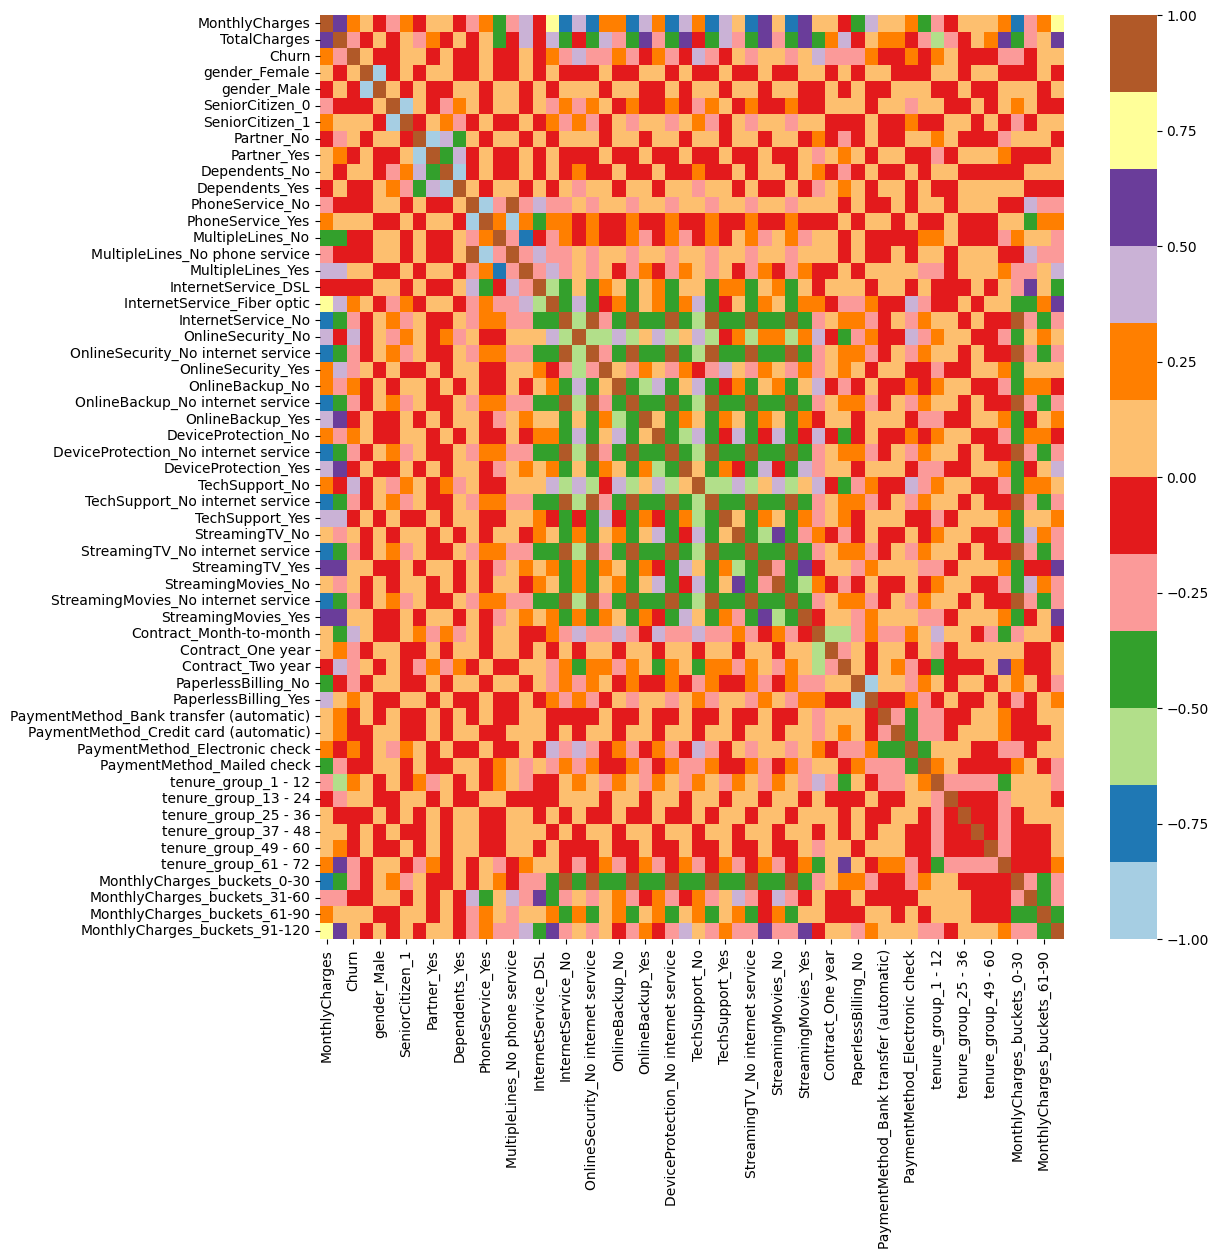

In [47]:
plt.figure(figsize=(12,12))
sns.heatmap(telco_dummies.corr(), cmap="Paired")

In [48]:
# Select only numeric columns
#numeric_telco = telco.select_dtypes(include=['number'])

# Calculate correlation
#correlation = numeric_telco.corr()

# Plot the correlation heatmap
#sns.heatmap(correlation, annot=True, fmt='.2f')
#plt.show()


## Bivariate_analysis

### Relationship between Monthly charge and Total Charge and Customer Churn

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) 

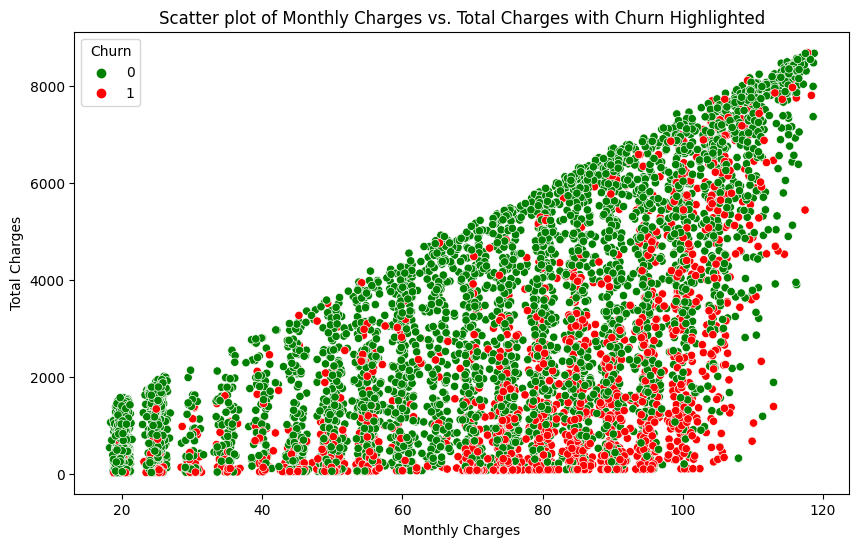

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'Churn' is a binary variable with values 0 and 1
plt.figure(figsize=(10, 6))
sns.scatterplot(x='MonthlyCharges', y='TotalCharges', data=telco, hue="Churn", palette={0: 'green', 1: 'red'})
plt.xlabel('Monthly Charges')
plt.ylabel('Total Charges')
plt.title('Scatter plot of Monthly Charges vs. Total Charges with Churn Highlighted')
plt.show()


In [50]:
correlation_SeniorCitizen_Partner = telco[['MonthlyCharges','TotalCharges']].corr().iloc[0, 1]

print(f"Correlation between SeniorCitizen and Partner: {correlation_SeniorCitizen_Partner:.4f}")


Correlation between SeniorCitizen and Partner: 0.6511


## Chi-squared test 

### Chi-squared test of independence between two categorical variables -'gender' & 'SeniorCitizen'

**Null Hypothesis (H0)**:
- There is no association or relationship between the two categorical variables ('gender' and 'SeniorCitizen'). In other words, the variables are independent.

**Alternative Hypothesis (H1)**:
- There is a significant association or relationship between the two categorical variables ('gender' and 'SeniorCitizen'). In other words, the variables are dependent.

In [51]:
# Example in Python using Pandas and SciPy
import pandas as pd
from scipy.stats import chi2_contingency

# Assuming df is your DataFrame with categorical variables A and B
contingency_table = pd.crosstab(telco['gender'], telco['SeniorCitizen'])
chi2, p, _, _ = chi2_contingency(contingency_table)

print(f"Chi-square value: {chi2:.4f}")
print(f"P-value: {p:.4f}")

Chi-square value: 0.0145
P-value: 0.9043


**Chi-square Test Result**
- As the p-value is high (0.9043) than significance level(0.05) indicating that there is no significant evidence to reject the null hypothesis.
Therefore, based on this test, you would conclude that there is no significant association between 'gender' and 'SeniorCitizen' 

### Chi-squared test of independence between two categorical variables -'MonthlyCharges' & 'OnlineSecurity'

**Null Hypothesis (H0)**: 
- The two categorical variables are independent(MonthlyCharges & OnlineSecurity)

**Alternative Hypothesis (H1)**: 
- The two categorical variables are dependent.(MonthlyCharges & OnlineSecurity)
   

In [52]:
# Example in Python using Pandas and SciPy
import pandas as pd
from scipy.stats import chi2_contingency

# Assuming df is your DataFrame with categorical variables A and B
contingency_table = pd.crosstab(telco['MonthlyCharges'], telco['OnlineSecurity'])
chi2, p, _, _ = chi2_contingency(contingency_table)

print(f"Chi-square value: {chi2:.4f}")
print(f"P-value: {p:.4f}")

Chi-square value: 9131.6512
P-value: 0.0000


**Chi-square Test Result**

- With a low p-value, you may reject the null hypothesis, indicating that there is evidence to suggest a significant association between 'MonthlyCharges' and 'OnlineSecurity'.  

In [53]:
new_df1_target0=telco.loc[telco["Churn"]==0]
new_df1_target1=telco.loc[telco["Churn"]==1]

### "Visualization of the Distribution of 'PaymentMethod' for Churned Customers, Stratified by 'gender'"

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


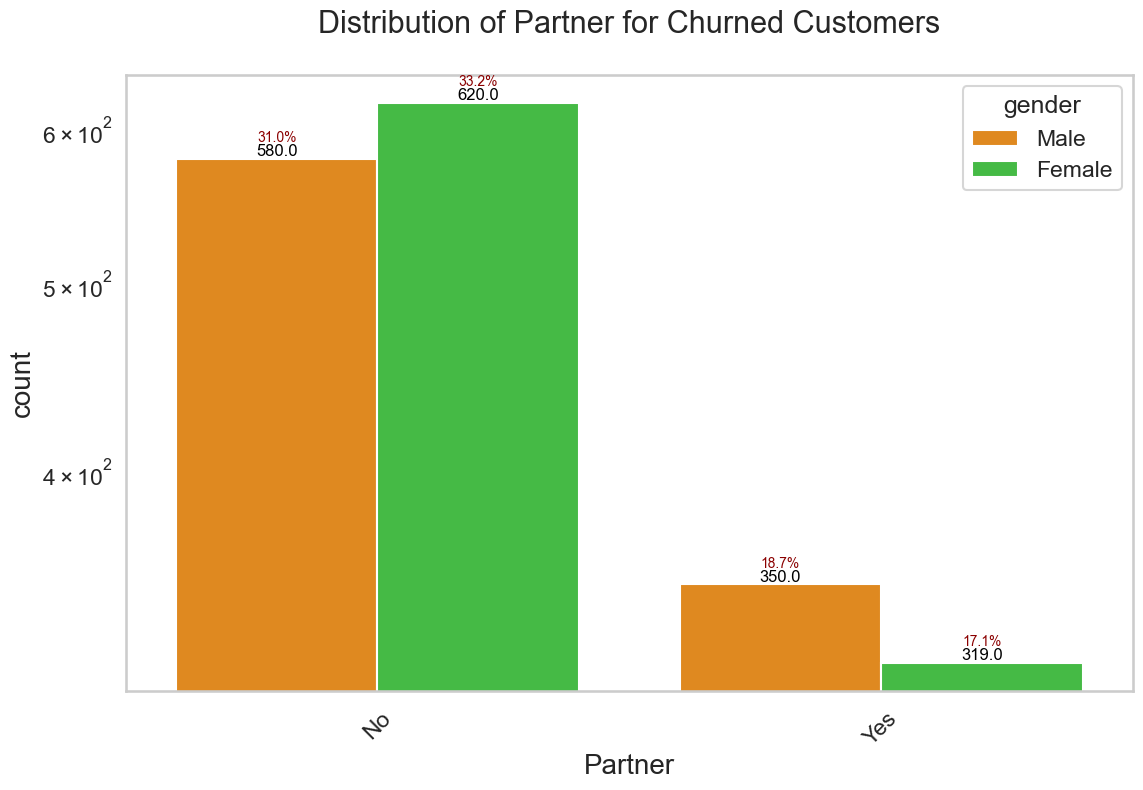

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.colors import LinearSegmentedColormap

def gradient_color_palette(start_color, end_color, n):
    # Create a gradient color palette from start_color to end_color with n steps
    cmap = LinearSegmentedColormap.from_list("custom", [start_color, end_color], N=n)
    return [cmap(i) for i in range(n)]

def uniplot(df, col, title, hue=None):
    # Set Seaborn styles and plot configurations
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    
    # Create a Pandas Series from the 'hue' parameter
    temp = pd.Series(data=hue)
    
    # Create a subplots figure
    fig, ax = plt.subplots()
    
    # Calculate the width of the figure based on the unique values in the specified column
    width = len(df[col].unique()) + 7 + 4 * len(temp.unique())
    fig.set_size_inches(width, 8)
    
    # Rotate x-axis labels for better visibility
    plt.xticks(rotation=45)
    
    # Set y-axis scale to logarithmic
    plt.yscale('log')
    
    # Set the title of the plot
    plt.title(title)
    
    # Define the gradient color palette
    gradient_palette = gradient_color_palette("darkorange", "limegreen", len(df[hue].unique()))
    
    # Create a count plot using Seaborn with the gradient color palette
    ax = sns.countplot(data=df, x=col, order=df[col].value_counts().index, hue=hue, palette=gradient_palette)
    
    # Add count annotations on the bars
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                    textcoords='offset points')
    
    # Add percentage annotations on the top of the bars
    total = float(len(df))
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        ax.annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=10, color='darkred', xytext=(0, 15),
                    textcoords='offset points')

    # Display the plot
    plt.show()

# Example usage
uniplot(new_df1_target1, col='Partner', title='Distribution of Partner for Churned Customers', hue='gender')


#### "Visualization of the Distribution of 'Gender' for Churned Customers, Stratified by 'Partner'"

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


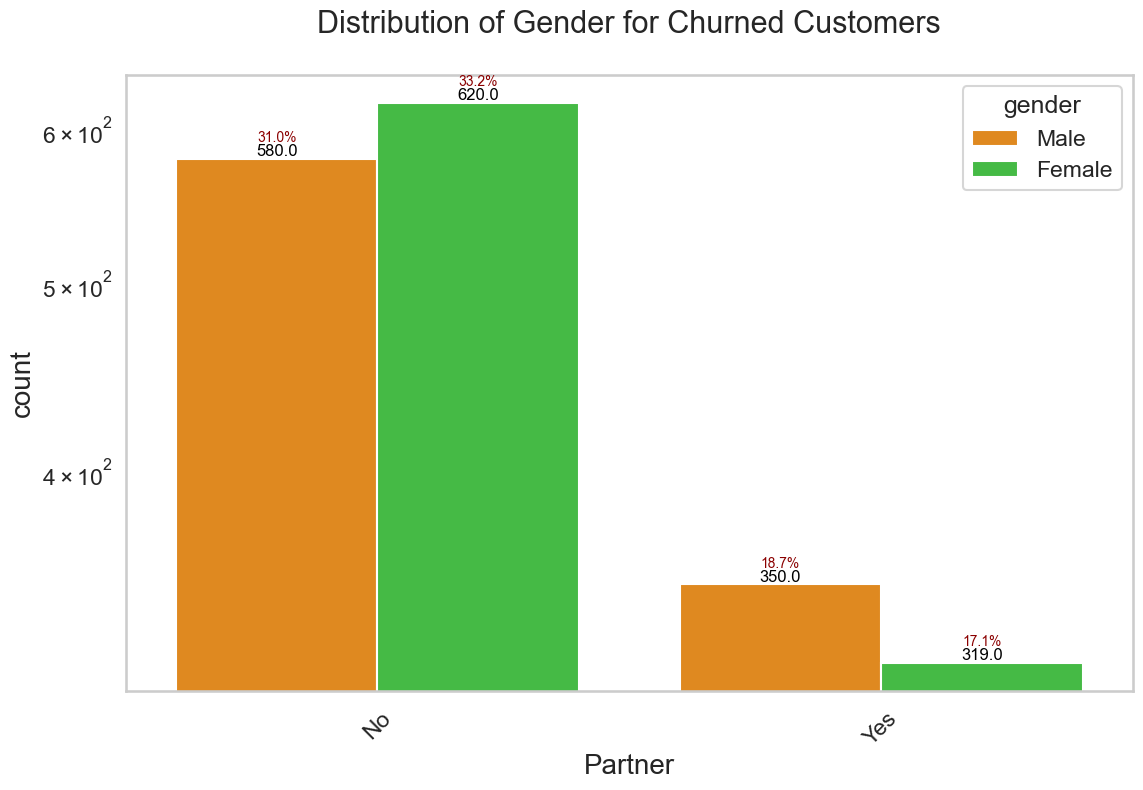

In [55]:
uniplot(new_df1_target1,col='Partner',title='Distribution of Gender for Churned Customers',hue='gender')

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


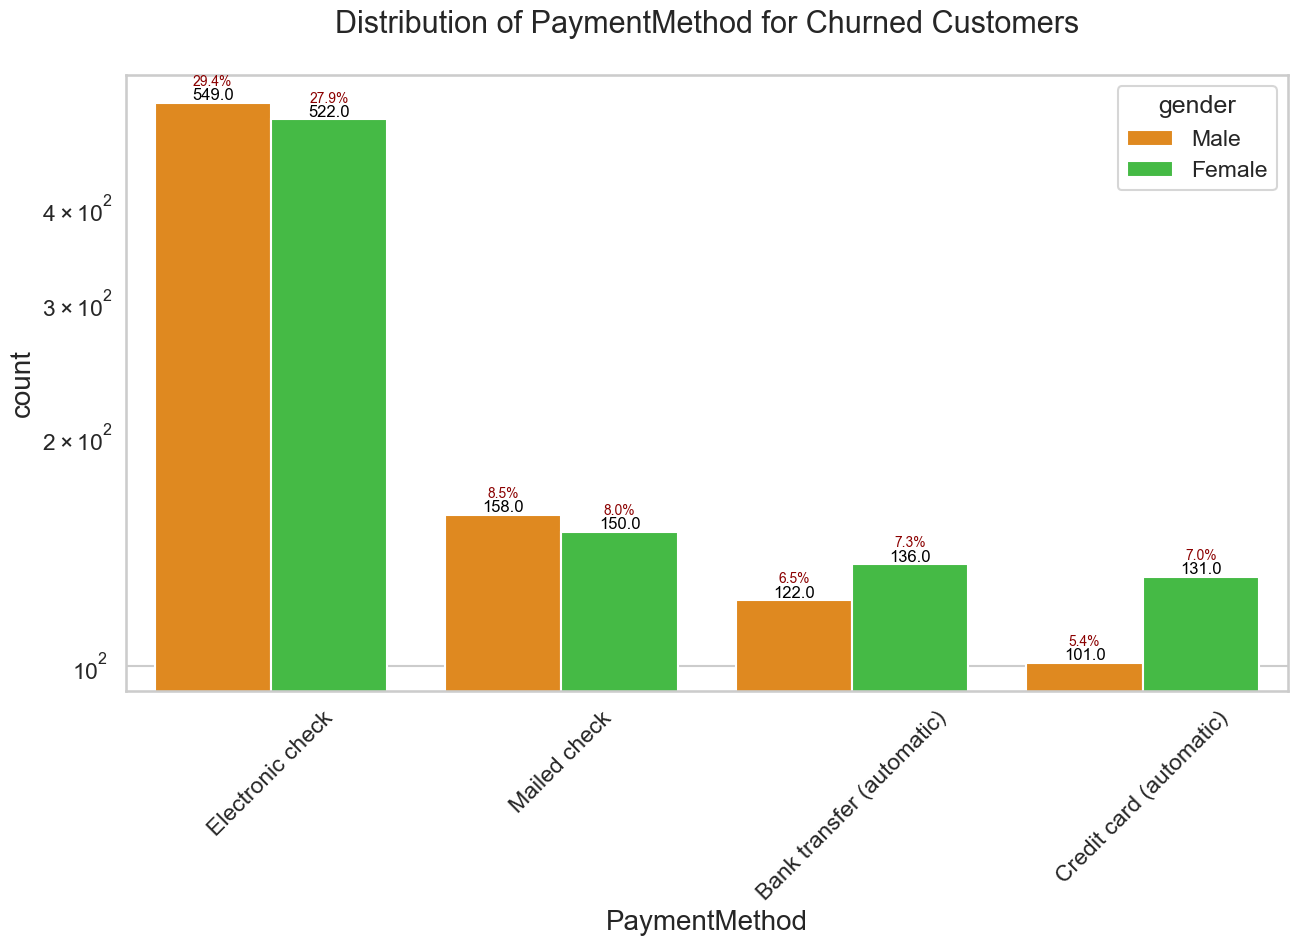

In [56]:
uniplot(new_df1_target1,col='PaymentMethod',title='Distribution of PaymentMethod for Churned Customers',hue='gender')

### "Visualization of the Distribution of 'Contract' for Churned Customers, Stratified by 'gender'"

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


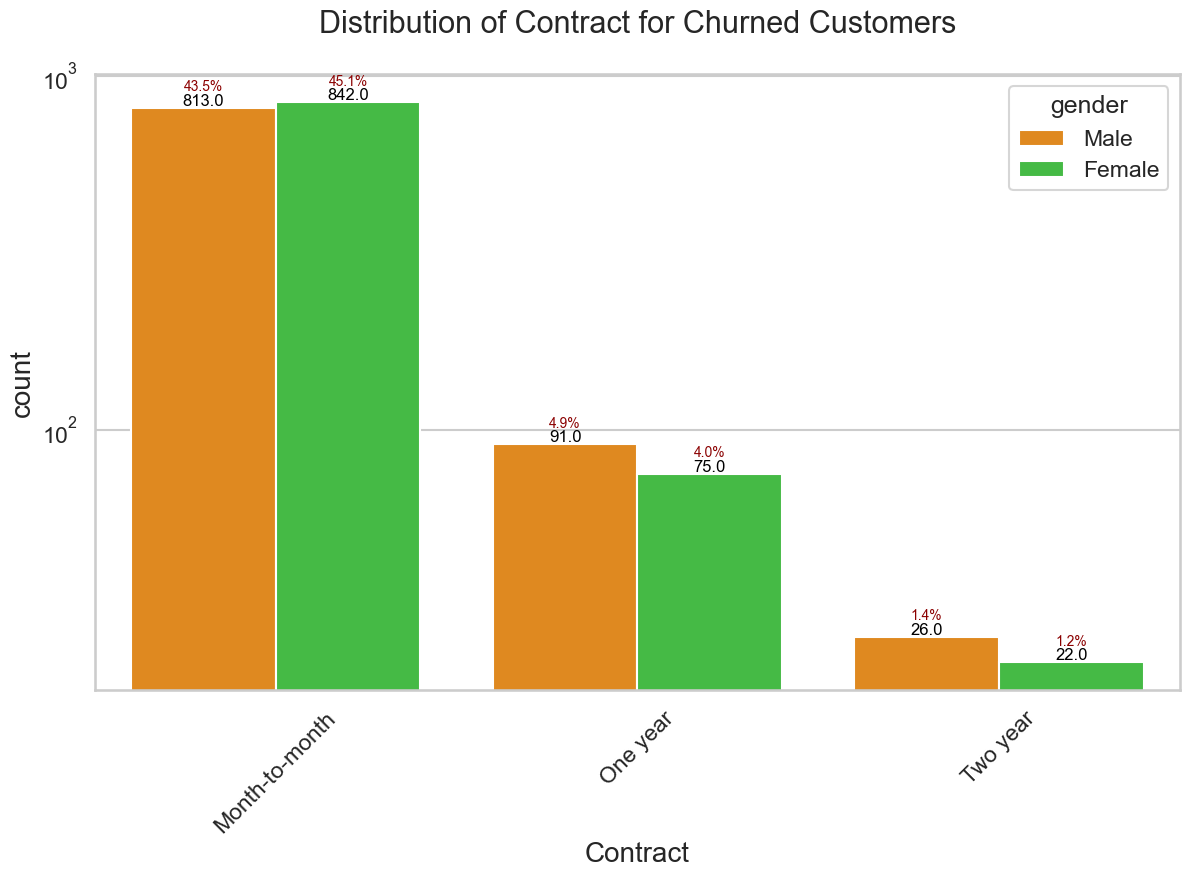

In [57]:
uniplot(new_df1_target1,col='Contract',title='Distribution of Contract for Churned Customers',hue='gender')

### "Visualization of the Distribution of 'TechSupport' for Churned Customers, Stratified by 'gender'"

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


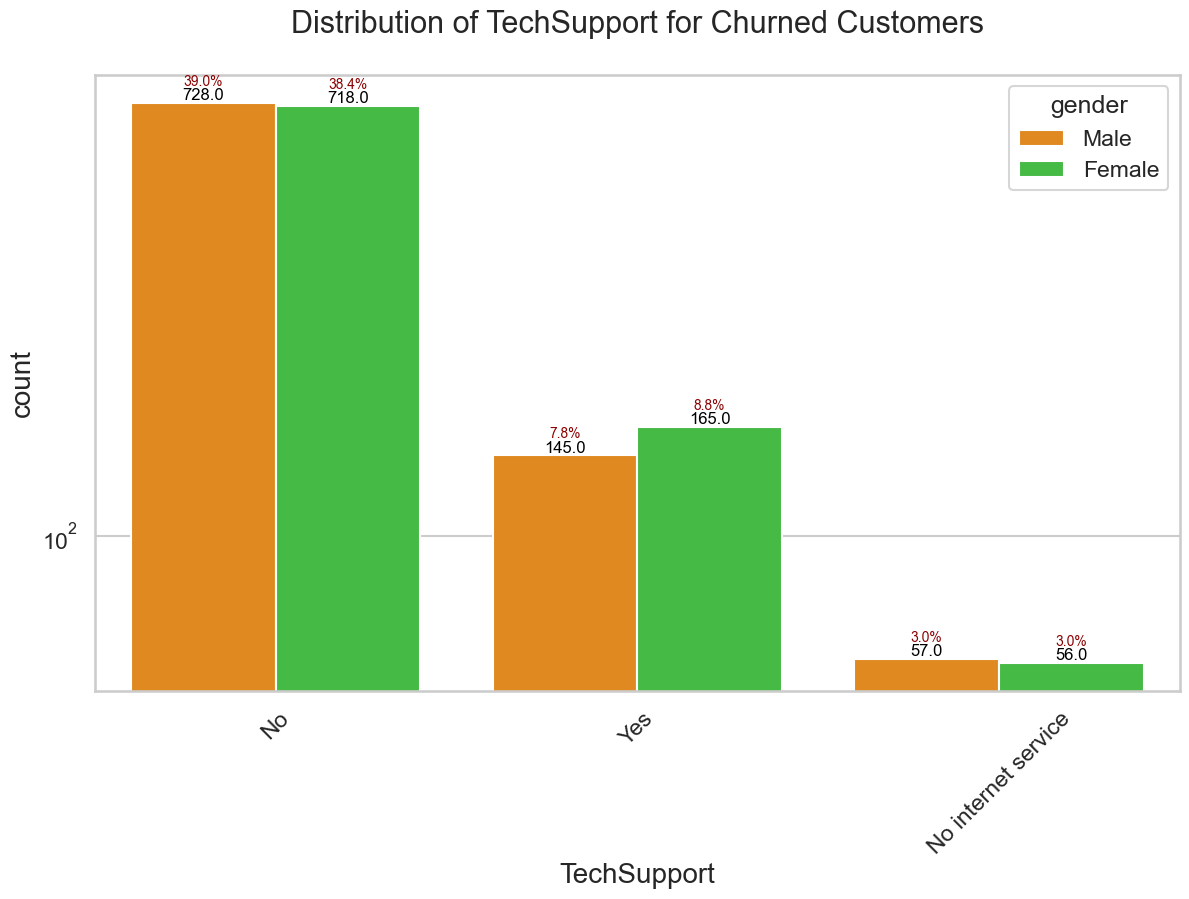

In [58]:
uniplot(new_df1_target1,col='TechSupport',title='Distribution of TechSupport for Churned Customers',hue='gender')

### "Visualization of the Distribution of 'SeniorCitizen' for Churned Customers, Stratified by 'gender'"

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


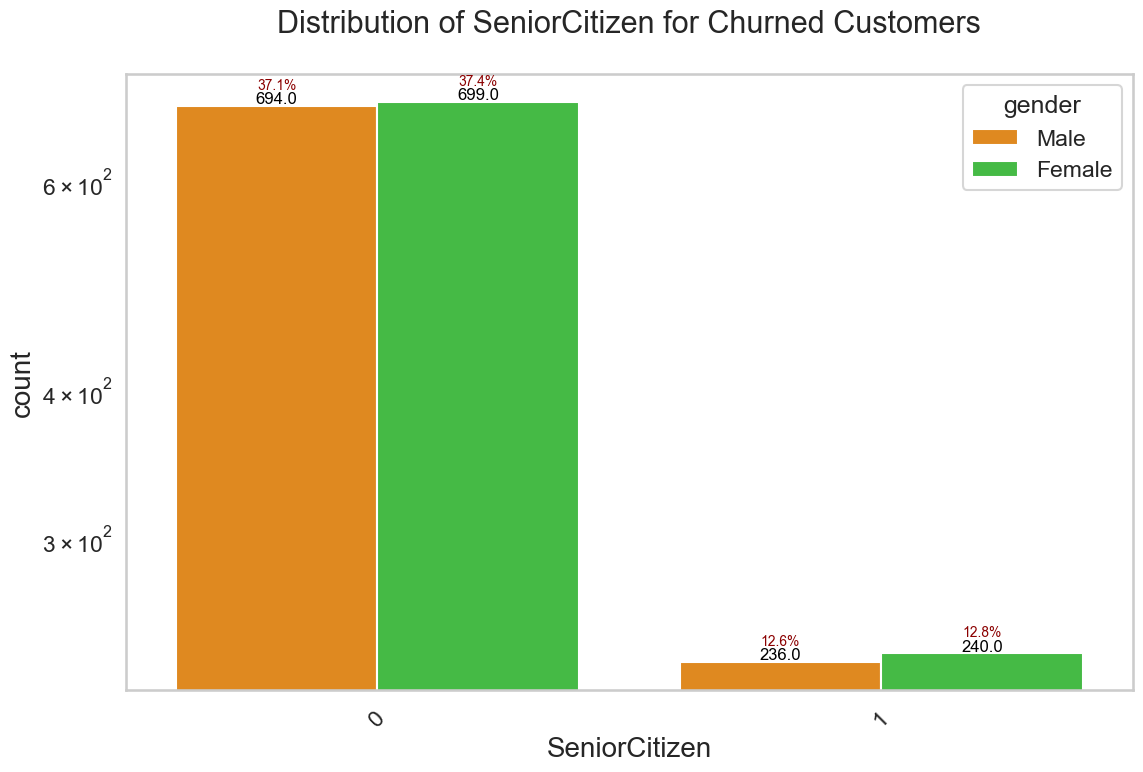

In [59]:
uniplot(new_df1_target1,col='SeniorCitizen',title='Distribution of SeniorCitizen for Churned Customers',hue='gender')

### We can use Heapmap for visualizing and analyzing customer churn patterns

# CONCLUSION

These are some of the quick insights from this exercise:

1. Electronic check medium are the highest churners
2. Contract Type - Monthly customers are more likely to churn because of no contract terms, as they are free to go customers.
3. No Online security, No Tech Support category are high churners
4. Non senior Citizens are high churners

Note: There could be many more such insights, so take this as an assignment and try to get more insights :)

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming telco_dummies is your DataFrame
plt.figure(figsize=(15, 12))

# Create a correlation matrix
correlation_matrix = telco_dummies.corr()

# Set thresholds for correlation values
high_threshold = 0.8
medium_threshold = 0.5
low_threshold = -0.5

# Select highly correlated, moderately correlated, and negatively correlated values
highly_correlated = (correlation_matrix.abs() > high_threshold) & (correlation_matrix.abs() < 1)
medium_correlated = ((correlation_matrix.abs() >= medium_threshold) & (correlation_matrix.abs() <= high_threshold))
negatively_correlated = (correlation_matrix < low_threshold)

# Plot the heatmap for highly correlated
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=True, fmt=".2f", mask=~highly_correlated)
plt.title("Highly Correlated")
plt.tight_layout()
plt.savefig("highly_correlated_plot.png")
plt.close()

# Plot the heatmap for moderately correlated
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=True, fmt=".2f", mask=~medium_correlated)
plt.title("Moderately Correlated")
plt.tight_layout()
plt.savefig("moderately_correlated_plot.png")
plt.close()

# Plot the heatmap for negatively correlated
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=True, fmt=".2f", mask=~negatively_correlated)
plt.title("Negatively Correlated")
plt.tight_layout()
plt.savefig("negatively_correlated_plot.png")
plt.close()

# Optional: Print the code for highly correlated pairs
correlated_pairs = []
for col in correlation_matrix.columns:
    correlated_cols = correlation_matrix.index[highly_correlated[col]]
    for correlated_col in correlated_cols:
        if col != correlated_col:
            pair = (col, correlated_col)
            correlated_pairs.append(pair)

print("Highly correlated pairs:")
for pair in correlated_pairs:
    print(f"\t{pair}")


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


Highly correlated pairs:
	('SeniorCitizen_0', 'SeniorCitizen_1')
	('SeniorCitizen_1', 'SeniorCitizen_0')
	('Partner_No', 'Partner_Yes')
	('Partner_Yes', 'Partner_No')
	('MultipleLines_No', 'MultipleLines_Yes')
	('MultipleLines_Yes', 'MultipleLines_No')
	('InternetService_No', 'MonthlyCharges_buckets_0-30')
	('OnlineSecurity_No internet service', 'MonthlyCharges_buckets_0-30')
	('OnlineBackup_No internet service', 'MonthlyCharges_buckets_0-30')
	('DeviceProtection_No internet service', 'MonthlyCharges_buckets_0-30')
	('TechSupport_No internet service', 'MonthlyCharges_buckets_0-30')
	('StreamingTV_No internet service', 'MonthlyCharges_buckets_0-30')
	('StreamingMovies_No internet service', 'MonthlyCharges_buckets_0-30')
	('PaperlessBilling_No', 'PaperlessBilling_Yes')
	('PaperlessBilling_Yes', 'PaperlessBilling_No')
	('MonthlyCharges_buckets_0-30', 'InternetService_No')
	('MonthlyCharges_buckets_0-30', 'OnlineSecurity_No internet service')
	('MonthlyCharges_buckets_0-30', 'OnlineBackup_

<Figure size 1500x1200 with 0 Axes>

In [61]:
#!pip install mplcursors

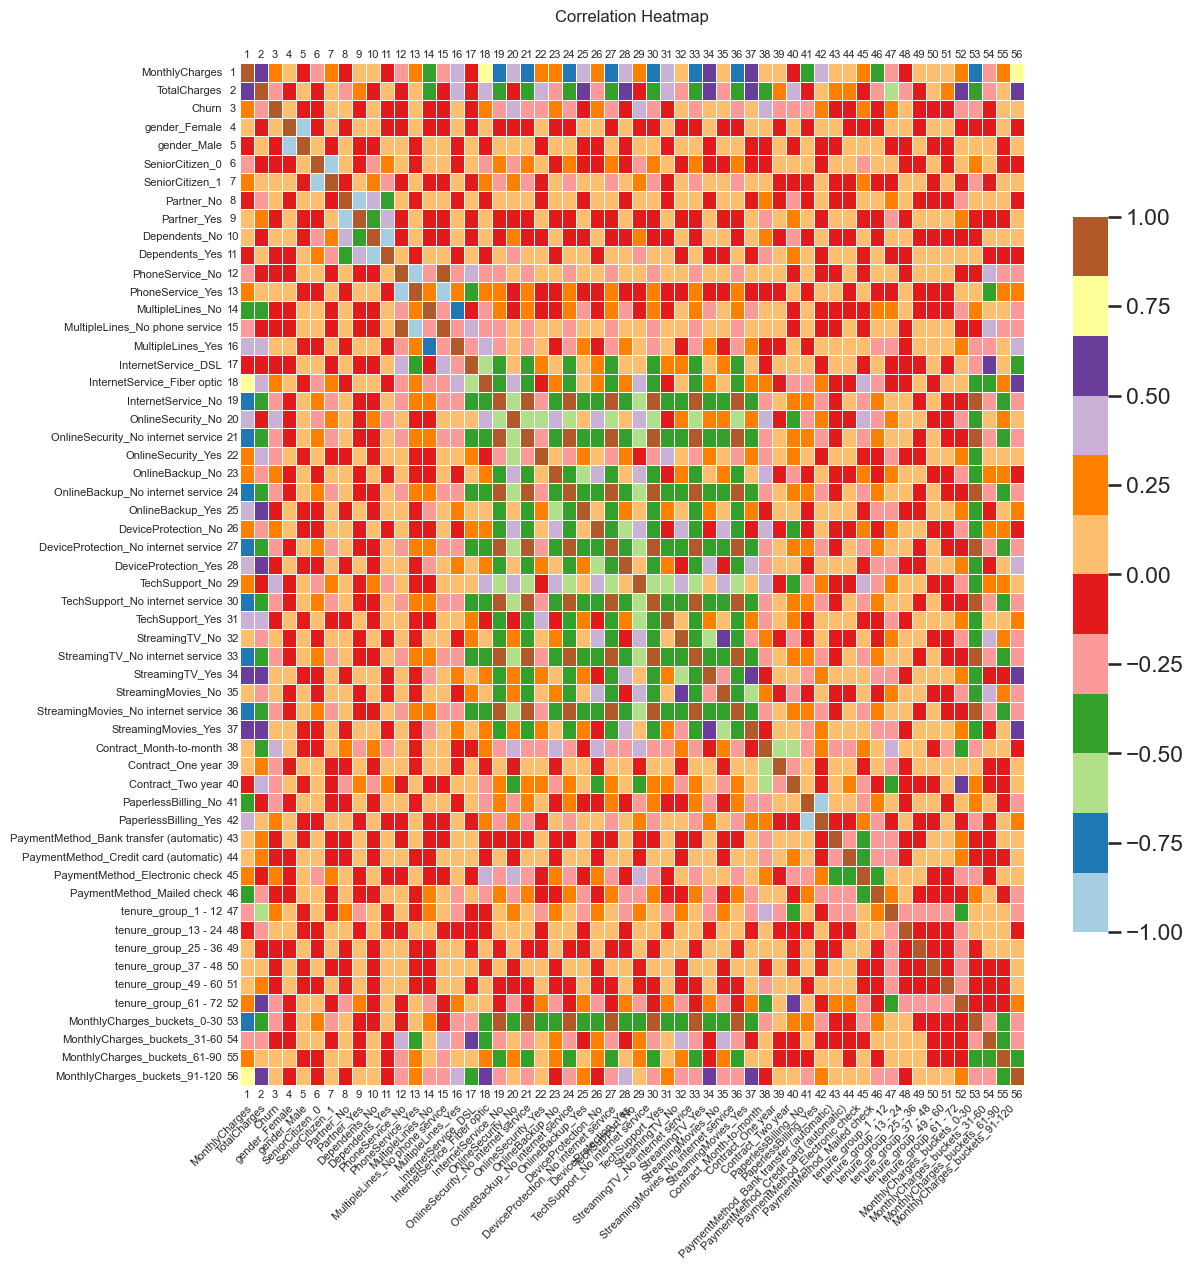

In [62]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import mplcursors
%matplotlib inline

# Set up the matplotlib figure with a larger size
plt.figure(figsize=(14, 14))

# Create a heatmap using Seaborn without displaying numeric values
heatmap = sns.heatmap(telco_dummies.corr(), cmap="Paired", annot=False, linewidths=.5, cbar_kws={"shrink": 0.7})

# Adjust font size of x-axis and y-axis labels
heatmap.set_xticklabels(heatmap.get_xticklabels(), fontsize=8, rotation=45, ha="right", rotation_mode="anchor")

# Show all tick labels on both axes
plt.xticks(ticks=[i + 0.5 for i in range(len(telco_dummies.columns))], labels=telco_dummies.columns, rotation=45, ha="right", fontsize=8)
plt.yticks(ticks=[i + 0.5 for i in range(len(telco_dummies.columns))], labels=telco_dummies.columns, fontsize=8)

# Add some space at the top
plt.subplots_adjust(left=0.2, bottom=0.15)

# Add serial numbers on the left, right, and below
for i, label in enumerate(telco_dummies.columns):
    plt.text(-0.5, i + 0.5, str(i + 1), ha="center", va="center", fontsize=8)
    plt.text(i + 0.5, -0.5, str(i + 1), ha="center", va="center", fontsize=8)
    plt.text(i + 0.5, len(telco_dummies.columns) + 0.5, str(i + 1), ha="center", va="center", fontsize=8)

# Add zoom-in/out functionality
mplcursors.cursor(hover=True)

# Show the plot
plt.title("Correlation Heatmap", fontsize=12)
plt.show()


In [63]:
telco_dummies.head()

,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,...,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72,MonthlyCharges_buckets_0-30,MonthlyCharges_buckets_31-60,MonthlyCharges_buckets_61-90,MonthlyCharges_buckets_91-120
0,29.85,29.85,0,True,False,True,False,False,True,True,...,True,False,False,False,False,False,True,False,False,False
1,56.95,1889.50,0,False,True,True,False,True,False,True,...,False,False,True,False,False,False,False,True,False,False
2,53.85,108.15,1,False,True,True,False,True,False,True,...,True,False,False,False,False,False,False,True,False,False
3,42.30,1840.75,0,False,True,True,False,True,False,True,...,False,False,False,True,False,False,False,True,False,False
4,70.70,151.65,1,True,False,True,False,True,False,True,...,True,False,False,False,False,False,False,False,True,False


In [64]:
telco_dummies.to_csv('tel_churn.csv')